# Job Salary Research
## Project Overview
### Project Goal
Understand the current job market for data/scientists roles, the objective is feeding these datapoints into a ML model to and understanding how much my own resume is worth and I should demand as a fair compensation for my services.
### Tenets
We are going to look into salaries for different job roles at individual contributor level:
- Applied Scientists
- Research Scientist
- Data Scientists
- ML Scientists/Engineers
- Data Analysts
- Business Intelligence Engineers
- Business Analysts
### Data Sources
We are going to use Glassdoor and scrape it with Selenium. We are not going to use Linkedin as we don't have a ready to go scraper as we do for Glassdoor. Also LinkedIn does not provide salary ranges like Glassdoor does.
This project should be revisited in the future to account for Linkedin job salary estimates as well.
We will follow some steps from [Ken Jee's Github project](https://github.com/PlayingNumbers/ds_salary_proj).
### Data Description
We are initially interested in looking at:
- Job Title/Position Estimate
- Job Description
- Hard Skills required
- YoE
- TC/BC
- Location
- Industry
- Size
- Company Age
- Rating
- Headquarters
- Shareholders: Private vs Public
- Company Size (Revenues)
- Competitors

## Install Libraries

In [1]:
# pip install selenium

In [3]:
# pip install beautifulsoup4

In [2]:
#pip install glassdoor_scraper

In [73]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import os
import numpy as np

In [3]:
import time

from selenium import webdriver



driver = webdriver.Chrome('/Users/niccolog/Documents/DataScience Own Projects')  # Optional argument, if not specified will search path.

driver.get('http://www.google.com/');

time.sleep(5) # Let the user actually see something!

search_box = driver.find_element_by_name('q')

search_box.send_keys('ChromeDriver')

search_box.submit()

time.sleep(5) # Let the user actually see something!

driver.quit()

<ipython-input-3-7cdf725deac5>:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/niccolog/Documents/DataScience Own Projects')  # Optional argument, if not specified will search path.


WebDriverException: Message: 'DataScience Own Projects' executable may have wrong permissions. Please see https://chromedriver.chromium.org/home


### Getting Data
Referencing for data collection the below authors and their work:
Main author: Kenarapfaik [url](https://github.com/arapfaik/scraping-glassdoor-selenium)
1st update: Ken Jee [url](https://github.com/PlayingNumbers/ds_salary_proj/blob/master/glassdoor_scraper.py)
2nd update: Ezequiel Starecinch [url](https://github.com/echestare/001KenJeeFromScratch_DSSalary/blob/master/glassdoor_scraper.py)
Selenium Documentation [Medium link](https://towardsdatascience.com/selenium-tutorial-scraping-glassdoor-com-in-10-minutes-3d0915c6d905)

In [46]:
def get_jobs(keyword, num_jobs, verbose, slp_time):

    '''Gathers jobs as a dataframe, scraped from Glassdoor'''

    #Initializing the webdriver
    options = webdriver.ChromeOptions()

    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')

    #Change the path to where chromedriver is in your home folder.
    driver = webdriver.Chrome(executable_path=str(os.getcwd()+'/chromedriver'), options=options)
    driver.set_window_size(1120, 1000)

    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword="+keyword+"&sc.keyword="+keyword+"&locT=&locId=&jobType="

    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(slp_time)
        #time.sleep(.1)

        #Going through each job in this page
        job_buttons = driver.find_elements_by_class_name("react-job-listing")  #looks like this works. Buy since I don't understand what I'm doing....
        for job_button in job_buttons:

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))

            if len(jobs) >= num_jobs:
                break

            job_button.click()  #You might

            time.sleep(1)

            collected_successfully = False

            try:
                driver.find_element_by_css_selector('[alt="Close"]').click()  #clicking to the X.    <- Again Ken Jee magic
            except NoSuchElementException:
                pass

            while not collected_successfully:

                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="css-xuk5ye e1tk4kwz5"]').text
                    location = driver.find_element_by_xpath('.//div[@class="css-56kyx5 e1tk4kwz1"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "css-1j389vi e1tk4kwz2")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True

                except:
                    time.sleep(5)

            try:
                salary_estimate = driver.find_element_by_xpath('.//span[@class="css-1hbqxax e1wijj240"]').text#    <- Again Ken Jee magic
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."

            try:
                rating = driver.find_element_by_xpath('.//span[@class="css-1m5m32b e1tk4kwz4"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            try:
                driver.find_element_by_xpath('.//div[@data-item="tab" and @data-tab-type="overview"]').click()

                try:
                    size = driver.find_element_by_xpath('.//span[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element_by_xpath('.//span[text()="Founded"]//following-sibling::*').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element_by_xpath('.//span[text()="Type"]//following-sibling::*').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element_by_xpath('.//span[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element_by_xpath('.//span[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element_by_xpath('.//span[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1


            except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1


            if verbose:
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
                         "Salary Estimate" : salary_estimate,
                         "Job Description" : job_description,
                         "Rating" : rating,
                         "Company Name" : company_name,
                         "Location" : location,
                         "Size" : size,
                         "Founded" : founded,
                         "Type of ownership" : type_of_ownership,
                         "Industry" : industry,
                         "Sector" : sector,
                         "Revenue" : revenue})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element_by_xpath('.//a[@data-test="pagination-next"]').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

    return pd.DataFrame(jobs)  #This line converts the dictionary object into a pandas DataFrame.


In [47]:
# get data scientist data 1000 jobs
df = get_jobs('data scientist',1000, False, 15)
df.to_csv('glassdoor_jobs_data_scientist.csv', index = False)

<ipython-input-46-57e1d782cf75>:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=str(os.getcwd()+'/chromedriver'), options=options)
<ipython-input-46-57e1d782cf75>:28: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  job_buttons = driver.find_elements_by_class_name("react-job-listing")  #looks like this works. Buy since I don't understand what I'm doing....


Progress: 0/1000


<ipython-input-46-57e1d782cf75>:43: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('[alt="Close"]').click()  #clicking to the X.    <- Again Ken Jee magic
<ipython-input-46-57e1d782cf75>:50: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  company_name = driver.find_element_by_xpath('.//div[@class="css-xuk5ye e1tk4kwz5"]').text
<ipython-input-46-57e1d782cf75>:51: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  location = driver.find_element_by_xpath('.//div[@class="css-56kyx5 e1tk4kwz1"]').text
<ipython-input-46-57e1d782cf75>:52: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  job_title = driver.find_element_by_xpath('.//div[contains(@class, "css-1j389vi e1tk4kwz2")]').text
<ipython-input-46-57e1d782cf75>:53: DeprecationWarning: find_element_by_* com

Progress: 1/1000
Progress: 2/1000
Progress: 3/1000
Progress: 4/1000
Progress: 5/1000
Progress: 6/1000
Progress: 7/1000
Progress: 8/1000
Progress: 9/1000
Progress: 10/1000
Progress: 11/1000
Progress: 12/1000
Progress: 13/1000
Progress: 14/1000
Progress: 15/1000
Progress: 16/1000
Progress: 17/1000
Progress: 18/1000
Progress: 19/1000
Progress: 20/1000
Progress: 21/1000
Progress: 22/1000
Progress: 23/1000
Progress: 24/1000
Progress: 25/1000
Progress: 26/1000
Progress: 27/1000
Progress: 28/1000
Progress: 29/1000


<ipython-input-46-57e1d782cf75>:148: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('.//a[@data-test="pagination-next"]').click()


Progress: 30/1000
Progress: 31/1000
Progress: 32/1000
Progress: 33/1000
Progress: 34/1000
Progress: 35/1000
Progress: 36/1000
Progress: 37/1000
Progress: 38/1000
Progress: 39/1000
Progress: 40/1000
Progress: 41/1000
Progress: 42/1000
Progress: 43/1000
Progress: 44/1000
Progress: 45/1000
Progress: 46/1000
Progress: 47/1000
Progress: 48/1000
Progress: 49/1000
Progress: 50/1000
Progress: 51/1000
Progress: 52/1000
Progress: 53/1000
Progress: 54/1000
Progress: 55/1000
Progress: 56/1000
Progress: 57/1000
Progress: 58/1000
Progress: 59/1000
Progress: 60/1000
Progress: 61/1000
Progress: 62/1000
Progress: 63/1000
Progress: 64/1000
Progress: 65/1000
Progress: 66/1000
Progress: 67/1000
Progress: 68/1000
Progress: 69/1000
Progress: 70/1000
Progress: 71/1000
Progress: 72/1000
Progress: 73/1000
Progress: 74/1000
Progress: 75/1000
Progress: 76/1000
Progress: 77/1000
Progress: 78/1000
Progress: 79/1000
Progress: 80/1000
Progress: 81/1000
Progress: 82/1000
Progress: 83/1000
Progress: 84/1000
Progress: 

In [49]:
# get data analyst data 1000 jobs
df = get_jobs('data analyst',1000, False, 15)
df.to_csv('glassdoor_jobs_data_analyst.csv', index = False)

<ipython-input-46-57e1d782cf75>:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=str(os.getcwd()+'/chromedriver'), options=options)
<ipython-input-46-57e1d782cf75>:28: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  job_buttons = driver.find_elements_by_class_name("react-job-listing")  #looks like this works. Buy since I don't understand what I'm doing....


Progress: 0/1000


<ipython-input-46-57e1d782cf75>:43: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('[alt="Close"]').click()  #clicking to the X.    <- Again Ken Jee magic
<ipython-input-46-57e1d782cf75>:50: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  company_name = driver.find_element_by_xpath('.//div[@class="css-xuk5ye e1tk4kwz5"]').text
<ipython-input-46-57e1d782cf75>:51: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  location = driver.find_element_by_xpath('.//div[@class="css-56kyx5 e1tk4kwz1"]').text
<ipython-input-46-57e1d782cf75>:52: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  job_title = driver.find_element_by_xpath('.//div[contains(@class, "css-1j389vi e1tk4kwz2")]').text
<ipython-input-46-57e1d782cf75>:53: DeprecationWarning: find_element_by_* com

Progress: 1/1000
Progress: 2/1000
Progress: 3/1000
Progress: 4/1000
Progress: 5/1000
Progress: 6/1000
Progress: 7/1000
Progress: 8/1000
Progress: 9/1000
Progress: 10/1000
Progress: 11/1000
Progress: 12/1000
Progress: 13/1000
Progress: 14/1000
Progress: 15/1000
Progress: 16/1000
Progress: 17/1000
Progress: 18/1000
Progress: 19/1000
Progress: 20/1000
Progress: 21/1000
Progress: 22/1000
Progress: 23/1000
Progress: 24/1000
Progress: 25/1000
Progress: 26/1000
Progress: 27/1000
Progress: 28/1000
Progress: 29/1000


<ipython-input-46-57e1d782cf75>:148: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('.//a[@data-test="pagination-next"]').click()


Progress: 30/1000
Progress: 31/1000
Progress: 32/1000
Progress: 33/1000
Progress: 34/1000
Progress: 35/1000
Progress: 36/1000
Progress: 37/1000
Progress: 38/1000
Progress: 39/1000
Progress: 40/1000
Progress: 41/1000
Progress: 42/1000
Progress: 43/1000
Progress: 44/1000
Progress: 45/1000
Progress: 46/1000
Progress: 47/1000
Progress: 48/1000
Progress: 49/1000
Progress: 50/1000
Progress: 51/1000
Progress: 52/1000
Progress: 53/1000
Progress: 54/1000
Progress: 55/1000
Progress: 56/1000
Progress: 57/1000
Progress: 58/1000
Progress: 59/1000
Progress: 60/1000
Progress: 61/1000
Progress: 62/1000
Progress: 63/1000
Progress: 64/1000
Progress: 65/1000
Progress: 66/1000
Progress: 67/1000
Progress: 68/1000
Progress: 69/1000
Progress: 70/1000
Progress: 71/1000
Progress: 72/1000
Progress: 73/1000
Progress: 74/1000
Progress: 75/1000
Progress: 76/1000
Progress: 77/1000
Progress: 78/1000
Progress: 79/1000
Progress: 80/1000
Progress: 81/1000
Progress: 82/1000
Progress: 83/1000
Progress: 84/1000
Progress: 

In [50]:
# get business intelligence engineer data 1000 jobs
df = get_jobs('business intelligence engineer',1000, False, 15)
df.to_csv('glassdoor_jobs_business_intelligence_engineer.csv', index = False)

<ipython-input-46-57e1d782cf75>:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=str(os.getcwd()+'/chromedriver'), options=options)
<ipython-input-46-57e1d782cf75>:28: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  job_buttons = driver.find_elements_by_class_name("react-job-listing")  #looks like this works. Buy since I don't understand what I'm doing....


Progress: 0/1000


<ipython-input-46-57e1d782cf75>:43: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('[alt="Close"]').click()  #clicking to the X.    <- Again Ken Jee magic
<ipython-input-46-57e1d782cf75>:50: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  company_name = driver.find_element_by_xpath('.//div[@class="css-xuk5ye e1tk4kwz5"]').text
<ipython-input-46-57e1d782cf75>:51: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  location = driver.find_element_by_xpath('.//div[@class="css-56kyx5 e1tk4kwz1"]').text
<ipython-input-46-57e1d782cf75>:52: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  job_title = driver.find_element_by_xpath('.//div[contains(@class, "css-1j389vi e1tk4kwz2")]').text
<ipython-input-46-57e1d782cf75>:53: DeprecationWarning: find_element_by_* com

Progress: 1/1000
Progress: 2/1000
Progress: 3/1000
Progress: 4/1000
Progress: 5/1000
Progress: 6/1000
Progress: 7/1000
Progress: 8/1000
Progress: 9/1000
Progress: 10/1000
Progress: 11/1000
Progress: 12/1000
Progress: 13/1000
Progress: 14/1000
Progress: 15/1000
Progress: 16/1000
Progress: 17/1000
Progress: 18/1000
Progress: 19/1000
Progress: 20/1000
Progress: 21/1000
Progress: 22/1000
Progress: 23/1000
Progress: 24/1000
Progress: 25/1000
Progress: 26/1000
Progress: 27/1000
Progress: 28/1000
Progress: 29/1000


<ipython-input-46-57e1d782cf75>:148: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('.//a[@data-test="pagination-next"]').click()


Progress: 30/1000
Progress: 31/1000
Progress: 32/1000
Progress: 33/1000
Progress: 34/1000
Progress: 35/1000
Progress: 36/1000
Progress: 37/1000
Progress: 38/1000
Progress: 39/1000
Progress: 40/1000
Progress: 41/1000
Progress: 42/1000
Progress: 43/1000
Progress: 44/1000
Progress: 45/1000
Progress: 46/1000
Progress: 47/1000
Progress: 48/1000
Progress: 49/1000
Progress: 50/1000
Progress: 51/1000
Progress: 52/1000
Progress: 53/1000
Progress: 54/1000
Progress: 55/1000
Progress: 56/1000
Progress: 57/1000
Progress: 58/1000
Progress: 59/1000
Progress: 60/1000
Progress: 61/1000
Progress: 62/1000
Progress: 63/1000
Progress: 64/1000
Progress: 65/1000
Progress: 66/1000
Progress: 67/1000
Progress: 68/1000
Progress: 69/1000
Progress: 70/1000
Progress: 71/1000
Progress: 72/1000
Progress: 73/1000
Progress: 74/1000
Progress: 75/1000
Progress: 76/1000
Progress: 77/1000
Progress: 78/1000
Progress: 79/1000
Progress: 80/1000
Progress: 81/1000
Progress: 82/1000
Progress: 83/1000
Progress: 84/1000
Progress: 

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=95.0.4638.54)
Stacktrace:
0   chromedriver                        0x000000010df54c99 __gxx_personality_v0 + 579209
1   chromedriver                        0x000000010dee05f3 __gxx_personality_v0 + 102371
2   chromedriver                        0x000000010daa613f chromedriver + 172351
3   chromedriver                        0x000000010dadc2b0 chromedriver + 393904
4   chromedriver                        0x000000010dad05bc chromedriver + 345532
5   chromedriver                        0x000000010daf8472 chromedriver + 509042
6   chromedriver                        0x000000010dad0355 chromedriver + 344917
7   chromedriver                        0x000000010daf86ee chromedriver + 509678
8   chromedriver                        0x000000010db0aeab chromedriver + 585387
9   chromedriver                        0x000000010daf8693 chromedriver + 509587
10  chromedriver                        0x000000010daceb7e chromedriver + 338814
11  chromedriver                        0x000000010dacfea5 chromedriver + 343717
12  chromedriver                        0x000000010df1077f __gxx_personality_v0 + 299375
13  chromedriver                        0x000000010df2768a __gxx_personality_v0 + 393338
14  chromedriver                        0x000000010df2d8eb __gxx_personality_v0 + 418523
15  chromedriver                        0x000000010df28a2a __gxx_personality_v0 + 398362
16  chromedriver                        0x000000010df0534c __gxx_personality_v0 + 253244
17  chromedriver                        0x000000010df44c48 __gxx_personality_v0 + 513592
18  chromedriver                        0x000000010df44dd1 __gxx_personality_v0 + 513985
19  chromedriver                        0x000000010df5c0c8 __gxx_personality_v0 + 608952
20  libsystem_pthread.dylib             0x00007fff204ff8fc _pthread_start + 224
21  libsystem_pthread.dylib             0x00007fff204fb443 thread_start + 15


### Combines files together
Now that we have collected all data let's combine them together before we start our EDA

In [3]:
# combine files data together
scientist_data = pd.read_csv('glassdoor_jobs_data_scientist.csv')
analyst_data = pd.read_csv('glassdoor_jobs_data_analyst.csv')
jobs_data = scientist_data.append(analyst_data)
jobs_data = jobs_data.reset_index(drop=True)

## Initial Data Check

In [4]:
jobs_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,Employer Provided Salary:$150K,We are adding a Data Scientist to our growing ...,4.3,American Capital Group\n4.3,"Bellevue, WA",51 to 200 Employees,1986.0,Company - Private,Real Estate,Real Estate,Unknown / Non-Applicable
1,Scientist – Deep Learning (Computational Prote...,-1,Position\nScientist – Deep Learning (Computati...,-1.0,Arzeda,"Seattle, WA",-1,-1.0,-1,-1,-1,-1
2,Senior Data Scientist/ML Engineer,Employer Provided Salary:$120K - $200K,About Deep Sentinel\nDeep Sentinel is a breakt...,3.3,Deep Sentinel Corp.\n3.3,Remote,1 to 50 Employees,-1.0,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable
3,Data Scientist,Employer Provided Salary:$90K,The Data Scientist will play a pivotal role in...,-1.0,Key Data,Remote,-1,-1.0,-1,-1,-1,-1
4,Image Data Scientist - Computational Pathology,$57K - $106K (Glassdoor est.),"At Reveal, we believe that data matters. Help ...",4.7,Reveal Biosciences\n4.7,"San Diego, CA",1 to 50 Employees,-1.0,Company - Private,NaN,NaN,Less than $1 million (USD)


In [5]:
jobs_data.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
1995,Enterprise Data - Regulatory Product Analyst,$120K - $145K (Employer est.),The Bloomberg Enterprise Regulatory and Accoun...,4.1,Bloomberg\n4.1,"New York, NY",10000+ Employees,1981.0,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable
1996,Data Analyst Supporting the USPIS,$120K - $145K (Employer est.),Be a part of the nationwide law enforcement in...,3.3,FSA Federal\n3.3,"Washington, DC",1001 to 5000 Employees,2004.0,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD)
1997,Data Analyst Supporting the DEA,$120K - $145K (Employer est.),Be a part of the nationwide law enforcement in...,3.3,FSA Federal\n3.3,"Arlington, VA",1001 to 5000 Employees,2004.0,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD)
1998,Data Analyst Supporting the FBI,$120K - $145K (Employer est.),Be a part of the nationwide law enforcement in...,3.3,FSA Federal\n3.3,"Linthicum, MD",1001 to 5000 Employees,2004.0,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD)
1999,Senior Data Analyst,$120K - $145K (Employer est.),Company Background\nHealthmap Solutions (Healt...,5.0,Healthmap Solutions\n5.0,"Tampa, FL",1 to 50 Employees,-1.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable


In [6]:
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2000 non-null   object 
 1   Salary Estimate    2000 non-null   object 
 2   Job Description    2000 non-null   object 
 3   Rating             2000 non-null   float64
 4   Company Name       2000 non-null   object 
 5   Location           2000 non-null   object 
 6   Size               1993 non-null   object 
 7   Founded            1997 non-null   float64
 8   Type of ownership  1998 non-null   object 
 9   Industry           1999 non-null   object 
 10  Sector             1997 non-null   object 
 11  Revenue            1999 non-null   object 
dtypes: float64(2), object(10)
memory usage: 187.6+ KB


In [7]:
jobs_data.describe()

,Rating,Founded
count,2000.000000,1997.000000
mean,3.638850,1654.641462
std,1.412906,743.814251
min,-1.000000,-1.000000
25%,3.600000,1975.000000
50%,4.100000,1976.000000
75%,4.300000,2004.000000
max,5.000000,2017.000000


## Data Cleaning
We need to clean few things:
1. Salary remove $, remove all text, do an average
2. Split state from Location
3. Company Name only
4. Company Age (Startup vs established etc.)
5. Pull something out of Job description to understand better if different requirements have different salaries

### 1. Salary cleaning

In [8]:
# check unique values and see if there are odd/wrong ones
jobs_data['Salary Estimate'].value_counts()

# there is only 8 values for -1 we can delete those records
jobs_data = jobs_data[jobs_data['Salary Estimate'] != '-1']

# get a separate flag for both hourly rate and employer provided salaries, maybe there is some difference there
jobs_data['Hourly'] = jobs_data['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
jobs_data['Employer Provided'] = jobs_data['Salary Estimate'].apply(lambda x: 1 if 'Employer Provided Salary:' in x else 0)

# remove Glassdoor estimate and other text from Salary Estimate field creating a new cleaned Salary field
jobs_data['Salary'] = jobs_data['Salary Estimate'].apply(lambda x: x.split('(')[0])
jobs_data['Salary'] = jobs_data['Salary'].apply(lambda x: x.replace('K','').replace('$',''))
jobs_data['Salary'] = jobs_data['Salary'].apply(lambda x: x.lower().replace('employer provided salary:','').replace('per hour',''))
jobs_data['Min Salary'] = jobs_data['Salary'].apply(lambda x: int(x.split('-')[0]))
# the code is not working for max salary as some records have only an exact value and not a range in this case we need to edit the code to repeat the same values as min in order to keep the same value when we average
jobs_data['Max Salary'] = jobs_data['Salary'].apply(lambda x: int(x.split('-')[1]) if len(x.split('-')) == 2 else int(x.split('-')[0]))
jobs_data['Avg Salary'] = (jobs_data['Min Salary'] + jobs_data['Max Salary'])/2
# Pro rate per hour salary - missed by Ken we are going to multiply by 2.088 defined as follows:
# 261 avg working days per year over the past 3 years, 8 hours per day makes 2088, but yearly salaries are in thousands so 2088 divided by 1000
# 2.088 final value
jobs_data['Avg Salary'] = jobs_data['Avg Salary'] * jobs_data['Hourly'].apply(lambda x: 2.088 if x==1 else 1)

In [9]:
jobs_data[['Salary Estimate','Salary','Employer Provided','Hourly','Min Salary','Max Salary','Avg Salary']]

,Salary Estimate,Salary,Employer Provided,Hourly,Min Salary,Max Salary,Avg Salary
0,Employer Provided Salary:$150K,150,1,0,150,150,150.00
2,Employer Provided Salary:$120K - $200K,120 - 200,1,0,120,200,160.00
3,Employer Provided Salary:$90K,90,1,0,90,90,90.00
4,$57K - $106K (Glassdoor est.),57 - 106,0,0,57,106,81.50
5,Employer Provided Salary:$80 Per Hour,80,1,1,80,80,167.04
...,...,...,...,...,...,...,...
1995,$120K - $145K (Employer est.),120 - 145,0,0,120,145,132.50
1996,$120K - $145K (Employer est.),120 - 145,0,0,120,145,132.50
1997,$120K - $145K (Employer est.),120 - 145,0,0,120,145,132.50
1998,$120K - $145K (Employer est.),120 - 145,0,0,120,145,132.50


### 2. State field

In [10]:
# we need to add an extra condition for Cuyahoga Ohio that has 2 commas in the records thus breaking our code
# Ken forgot Los Angeles in his code, here we checked we are left only with States
jobs_data['Location State'] = jobs_data['Location'].apply(lambda x: x.split(',')[1] if len(x.split(','))==2 else (x.split(',')[2] if len(x.split(','))==3 else x.split(',')[0]))
# we need to fix Washington State, while remote can stay as it is an important data point as well: do they get paid more or less?
jobs_data['Location State'] = jobs_data['Location State'].apply(lambda x: x.replace('Washington State','WA')).apply(lambda x: x.strip())

In [11]:
jobs_data['Location State'].value_counts()

WA        797
NY        177
Remote    150
CA        149
TX        149
VA         86
DC         82
FL         65
MA         35
CT         32
MD         28
TN         27
OR         25
AZ         23
UT         22
NJ         21
MI         18
GA         18
AL         16
OH         13
KY         12
IL         11
PA         11
NC          5
CO          4
NE          3
NV          3
IN          2
ID          2
HI          2
MN          1
WV          1
NH          1
OK          1
Name: Location State, dtype: int64

### 3. Company Name

In [12]:
jobs_data['Company'] = jobs_data['Company Name'].apply(lambda x: x.split('\n')[0]).apply(lambda x: x.split(',')[0]).apply(lambda x: x.lower().replace('llc','')).apply(lambda x: x.lower().replace('inc.','')).apply(lambda x: x.lower().replace('corp.',''))

In [13]:
jobs_data['Company'].value_counts()

apple                            470
zillow                           184
fsa federal                      137
indeed                            67
ursus                             47
                                ... 
the mitre corporation              1
trexin consulting                  1
ucla health                        1
wssc water                         1
calibrated healthcare network      1
Name: Company, Length: 175, dtype: int64

### 4. Company Age

In [14]:
jobs_data['Founded'].value_counts(dropna=False)

 1976.0    470
-1.0       333
 2004.0    208
 2005.0    204
 1994.0     59
          ... 
 1971.0      1
 2007.0      1
 1787.0      1
 2011.0      1
 1964.0      1
Name: Founded, Length: 68, dtype: int64

In [15]:
jobs_data['Founded'].fillna(-1, inplace=True)
jobs_data['Founded'] = jobs_data['Founded'].astype(int)

In [16]:
# keep -1 as it is
# Company Age defined as 2021 - foundation year
jobs_data['Company Age'] = jobs_data['Founded'].apply(lambda x: x if x<1 else 2021-x)

In [17]:
jobs_data['Company Age'].value_counts()

 45     470
-1      336
 17     208
 16     204
 27      59
       ... 
 102      1
 103      1
 50       1
 63       1
 57       1
Name: Company Age, Length: 67, dtype: int64

### 5. Job Description Requirements
We only want to check some specific requirements like:
1. Python
2. R
3. AWS
4. Tableau
5. ML
6. SQL
7. Excel
8. Spark
9. Apache
10. API

In [18]:
jobs_data['Python'] = jobs_data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
jobs_data['Python'].value_counts()

0    1811
1     181
Name: Python, dtype: int64

In [19]:
jobs_data['R Studio'] = jobs_data['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
jobs_data['R Studio'].value_counts()

0    1991
1       1
Name: R Studio, dtype: int64

In [20]:
jobs_data['AWS'] = jobs_data['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
jobs_data['AWS'].value_counts()

0    1954
1      38
Name: AWS, dtype: int64

In [21]:
jobs_data['ML'] = jobs_data['Job Description'].apply(lambda x: 1 if 'ml' in x.lower() or 'machine learning' in x.lower() else 0)
jobs_data['ML'].value_counts()

0    1376
1     616
Name: ML, dtype: int64

In [22]:
jobs_data['Tableau'] = jobs_data['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
jobs_data['Tableau'].value_counts()

0    1959
1      33
Name: Tableau, dtype: int64

In [23]:
jobs_data['SQL'] = jobs_data['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
jobs_data['SQL'].value_counts()

0    1834
1     158
Name: SQL, dtype: int64

In [24]:
jobs_data['Excel'] = jobs_data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
jobs_data['Excel'].value_counts()

0    1752
1     240
Name: Excel, dtype: int64

In [25]:
jobs_data['Spark'] = jobs_data['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
jobs_data['Spark'].value_counts()

0    1939
1      53
Name: Spark, dtype: int64

In [26]:
jobs_data['Apache'] = jobs_data['Job Description'].apply(lambda x: 1 if 'apache' in x.lower() else 0)
jobs_data['Apache'].value_counts()

0    1992
Name: Apache, dtype: int64

In [27]:
jobs_data['API'] = jobs_data['Job Description'].apply(lambda x: 1 if 'api' in x.lower() else 0)
jobs_data['API'].value_counts()

0    1769
1     223
Name: API, dtype: int64

In [28]:
jobs_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly', 'Employer Provided',
       'Salary', 'Min Salary', 'Max Salary', 'Avg Salary', 'Location State',
       'Company', 'Company Age', 'Python', 'R Studio', 'AWS', 'ML', 'Tableau',
       'SQL', 'Excel', 'Spark', 'Apache', 'API'],
      dtype='object')

In [29]:
jobs_data.to_csv('salary_data_cleaned.csv',index=False)

In [30]:
salary_data = pd.read_csv('salary_data_cleaned.csv')
salary_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Python,R Studio,AWS,ML,Tableau,SQL,Excel,Spark,Apache,API
0,Data Scientist,Employer Provided Salary:$150K,We are adding a Data Scientist to our growing ...,4.3,American Capital Group\n4.3,"Bellevue, WA",51 to 200 Employees,1986,Company - Private,Real Estate,...,0,0,0,0,0,0,0,0,0,1
1,Senior Data Scientist/ML Engineer,Employer Provided Salary:$120K - $200K,About Deep Sentinel\nDeep Sentinel is a breakt...,3.3,Deep Sentinel Corp.\n3.3,Remote,1 to 50 Employees,-1,Company - Private,Computer Hardware & Software,...,0,0,0,0,0,0,0,0,0,1
2,Data Scientist,Employer Provided Salary:$90K,The Data Scientist will play a pivotal role in...,-1.0,Key Data,Remote,-1,-1,-1,-1,...,0,0,0,1,0,0,0,0,0,0
3,Image Data Scientist - Computational Pathology,$57K - $106K (Glassdoor est.),"At Reveal, we believe that data matters. Help ...",4.7,Reveal Biosciences\n4.7,"San Diego, CA",1 to 50 Employees,-1,Company - Private,NaN,...,0,0,0,0,0,0,1,0,0,0
4,Sr. Data Analyst/Scientist,Employer Provided Salary:$80 Per Hour,Are you interested in defining the future of c...,4.4,Adobe\n4.4,"Seattle, WA",10000+ Employees,1982,Company - Public,Computer Hardware & Software,...,0,0,0,0,0,0,0,1,0,0


### 6. Job Seniority

In [31]:
def get_seniority(job_title):
    if 'sr' in job_title.lower() or 'senior' in job_title.lower() or 'lead' in job_title.lower() or 'principal' in job_title.lower() or 'sr.' in job_title.lower():
        return 'senior'
    elif 'jr' in job_title.lower() or 'junior' in job_title.lower() or 'jr.' in job_title.lower():
        return 'junior'
    else:
        return 'na'

In [32]:
jobs_data['Seniority'] = jobs_data['Job Title'].apply(get_seniority)

### 7. Job Title Simplified

In [33]:
def job_title_simplified(job_title):
    if 'scientist' in job_title.lower():
        return 'scientist'
    elif 'analyst' in job_title.lower():
        return 'analyst'
    elif 'machine learning' in job_title.lower():
        return 'mle'
    elif 'engineer' in job_title.lower():
        return 'engineer'
    elif 'manager' in job_title.lower():
        return 'manager'
    elif 'director' in job_title.lower():
        return 'director'
    else:
        return 'na'

In [34]:
jobs_data['Title'] = jobs_data['Job Title'].apply(job_title_simplified)

## EDA

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Seattle Area Data

In [36]:
seattle_jobs = jobs_data[jobs_data['Location State']=='WA']
seattle_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 1985
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          797 non-null    object 
 1   Salary Estimate    797 non-null    object 
 2   Job Description    797 non-null    object 
 3   Rating             797 non-null    float64
 4   Company Name       797 non-null    object 
 5   Location           797 non-null    object 
 6   Size               796 non-null    object 
 7   Founded            797 non-null    int64  
 8   Type of ownership  796 non-null    object 
 9   Industry           797 non-null    object 
 10  Sector             796 non-null    object 
 11  Revenue            797 non-null    object 
 12  Hourly             797 non-null    int64  
 13  Employer Provided  797 non-null    int64  
 14  Salary             797 non-null    object 
 15  Min Salary         797 non-null    int64  
 16  Max Salary         797 no

In [37]:
hue_variables = ['Seniority','Python','SQL','Tableau','Location','Title','Type of ownership']
length = list(range(1,len(hue_variables)+1))
length

[1, 2, 3, 4, 5, 6, 7]

### 1A) Salary Distributions

<Figure size 648x432 with 0 Axes>

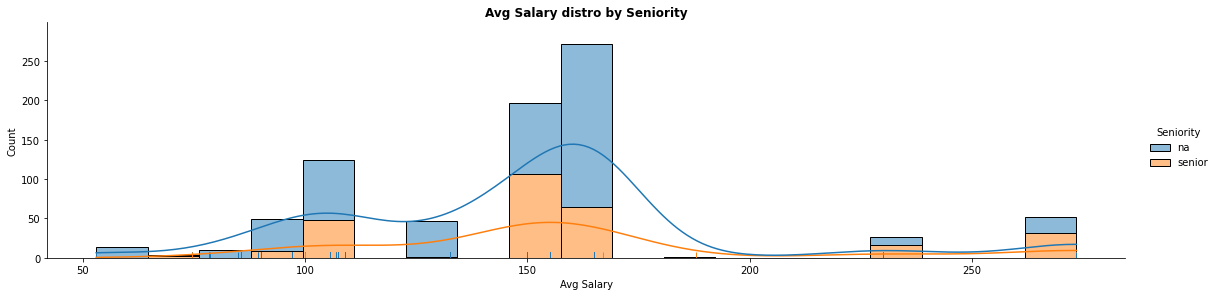

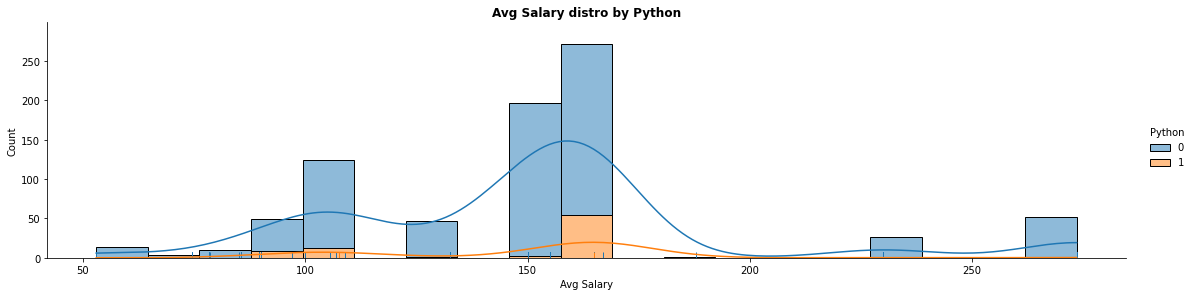

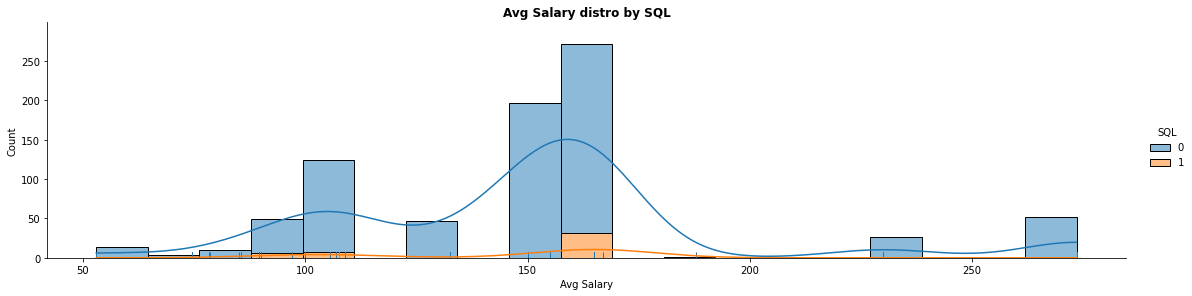

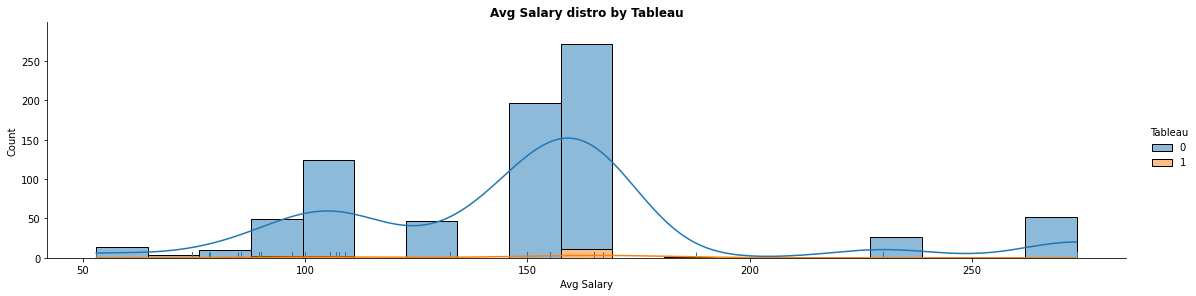

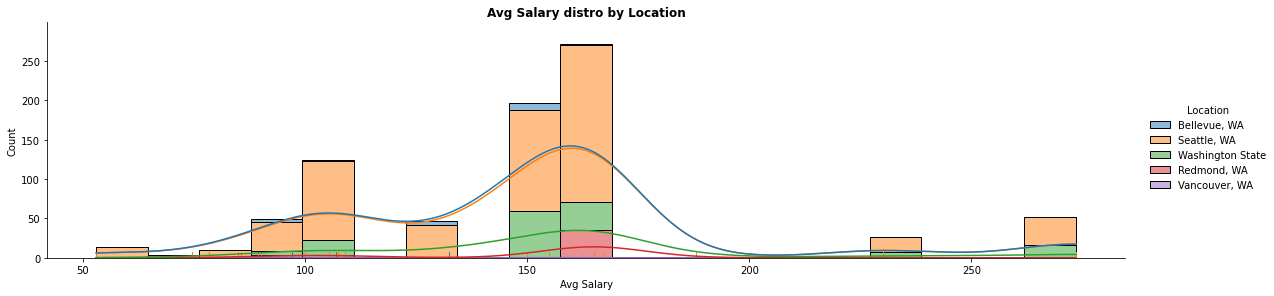

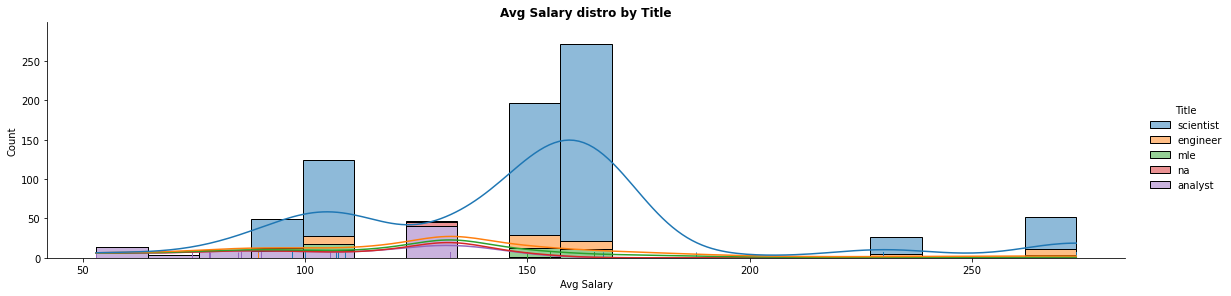

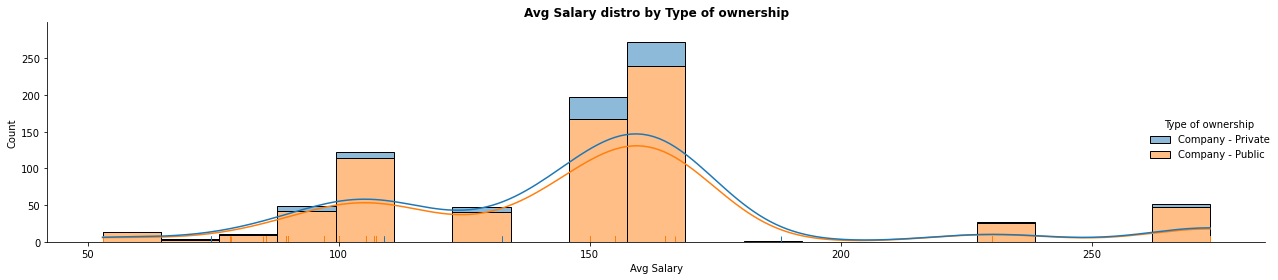

In [38]:
plt.figure(figsize=(9,6))
for h,l in zip(hue_variables,length):
    #plt.subplot(3,2,l)
    sns.displot(data=seattle_jobs, x='Avg Salary', kde=True, hue=h, kind='hist', rug=True, height=4, aspect=4, multiple='stack')
    plt.title('Avg Salary distro by '+h, weight='bold')
plt.tight_layout()
plt.show()

### 1B) Rating Distribution

<Figure size 648x432 with 0 Axes>

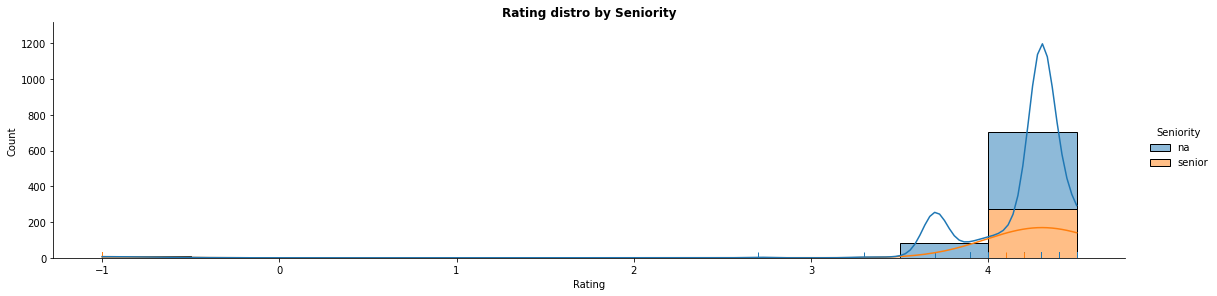

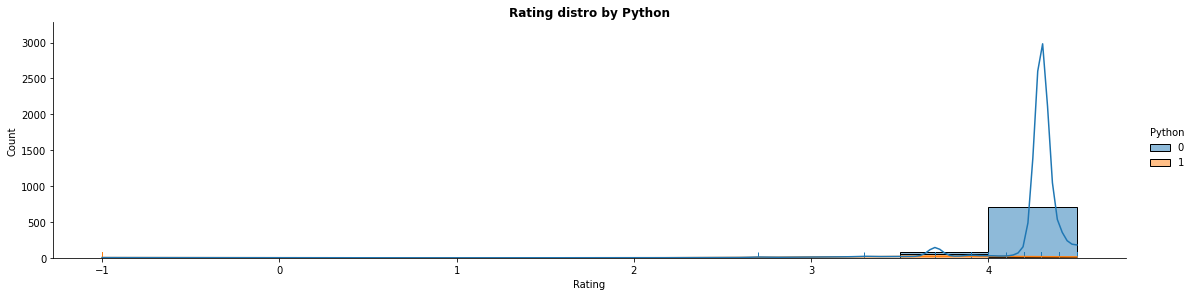

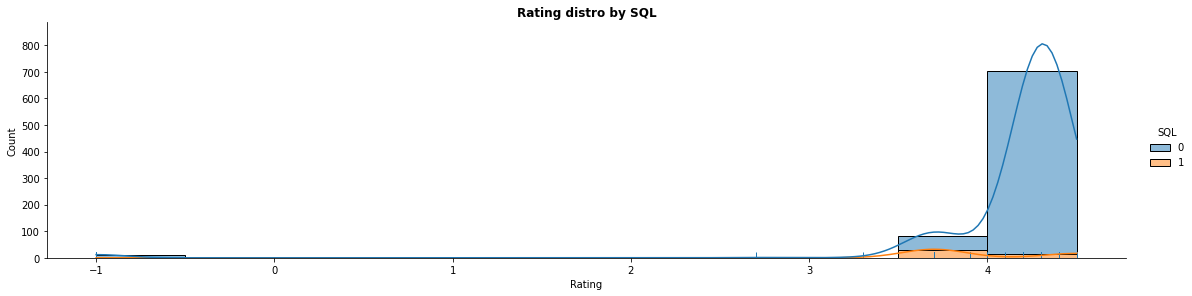

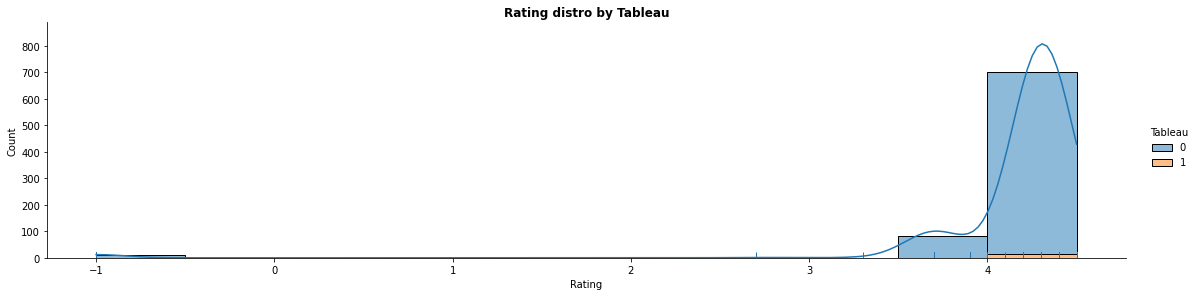

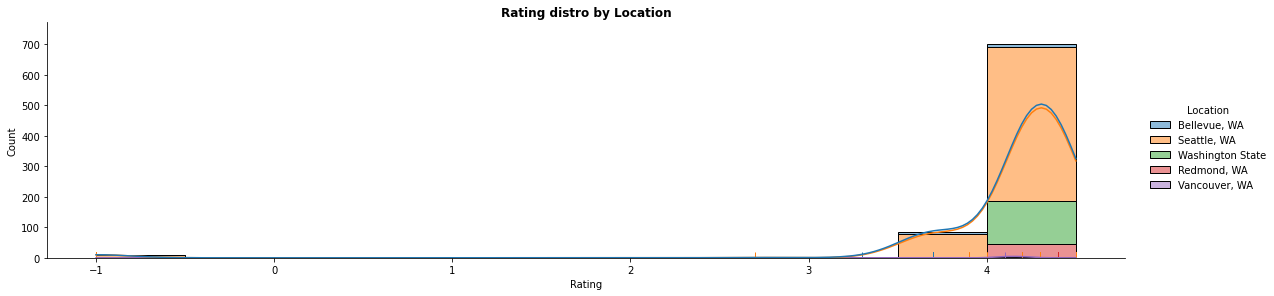

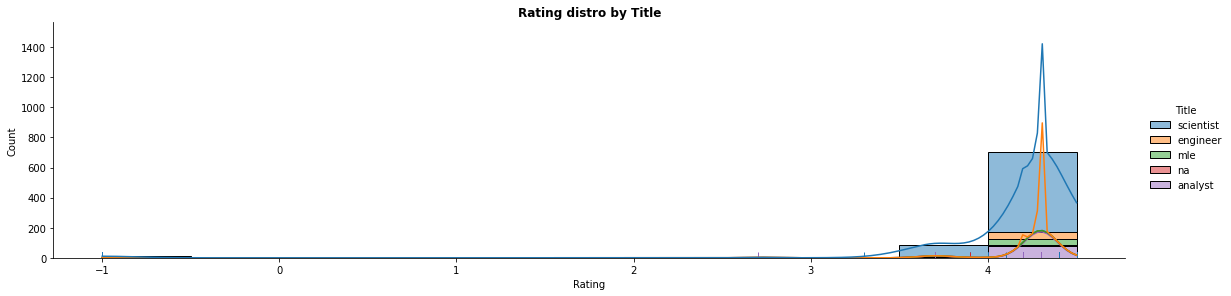

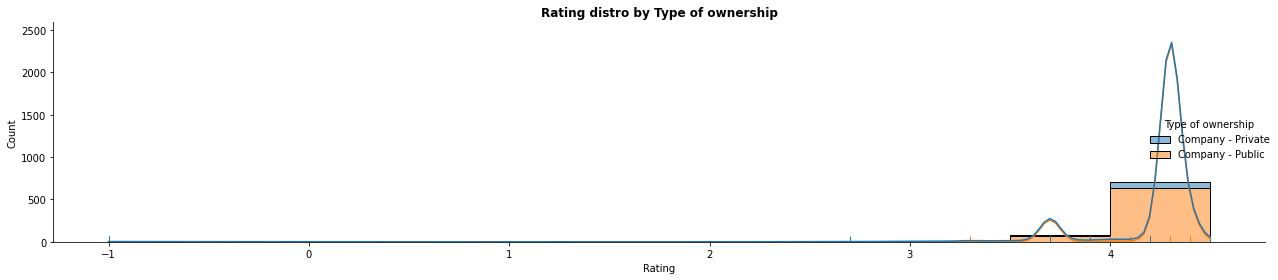

In [39]:
plt.figure(figsize=(9,6))
for h,l in zip(hue_variables,length):
    #plt.subplot(3,2,l)
    sns.displot(data=seattle_jobs, x='Rating', kde=True, hue=h, kind='hist', rug=True, height=4, aspect=4, multiple='stack')
    plt.title('Rating distro by '+h, weight='bold')
plt.tight_layout()
plt.show()

All ratings seem to be heavily skewed towards max rating 5.

### 1C) Company Age

<Figure size 648x432 with 0 Axes>

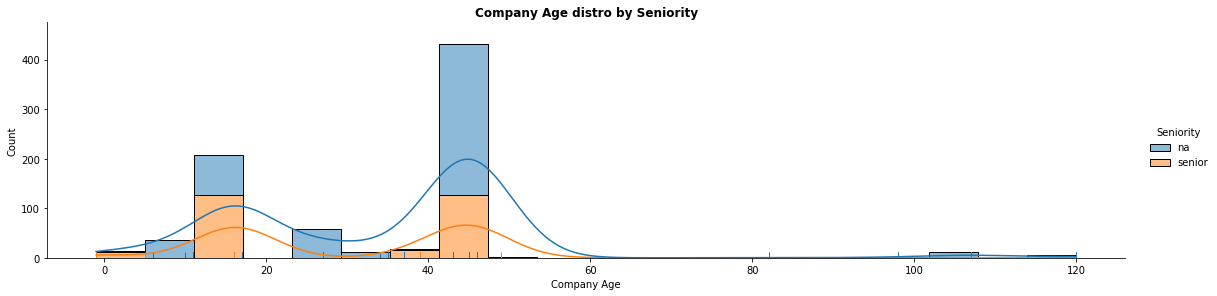

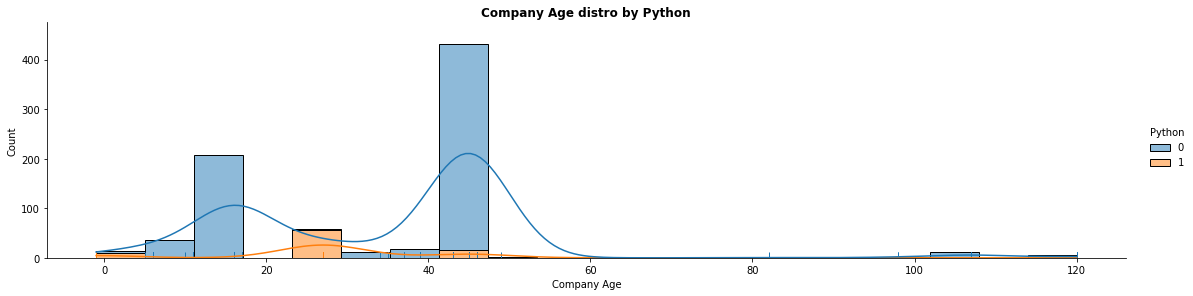

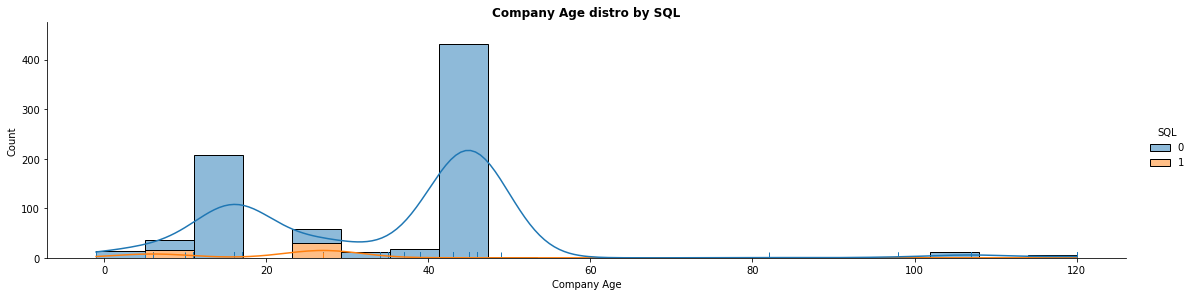

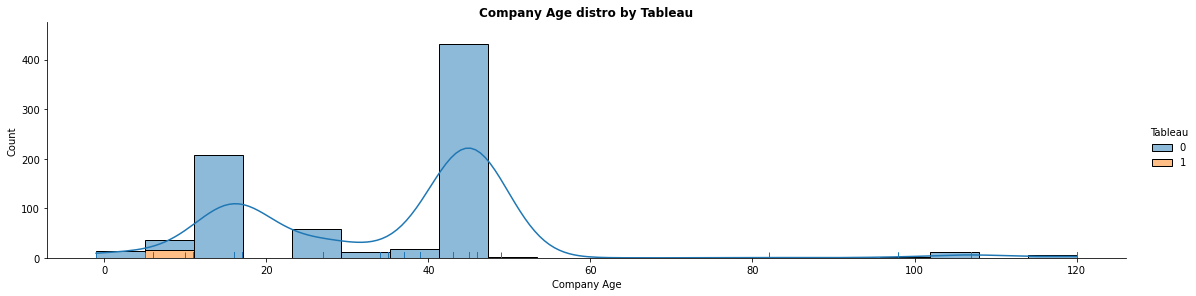

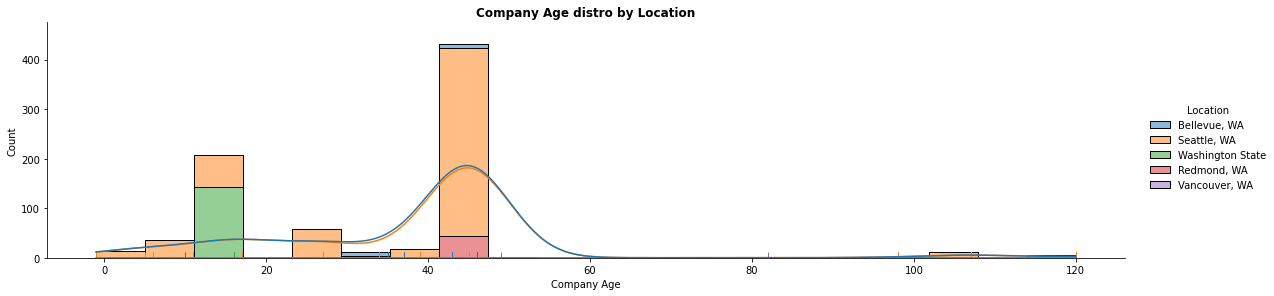

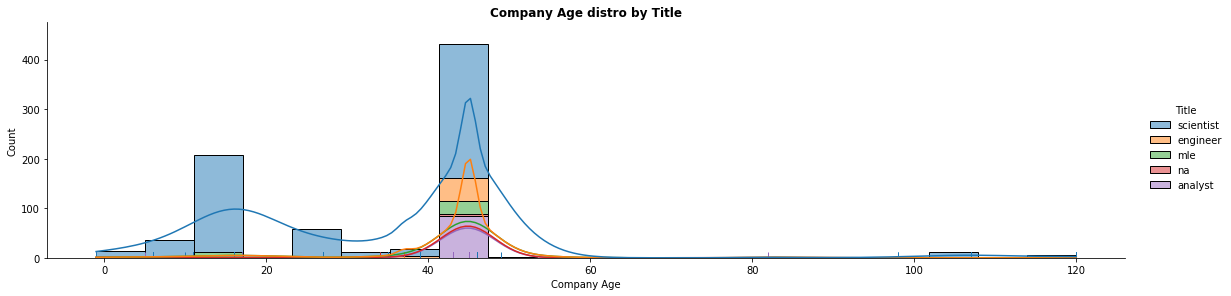

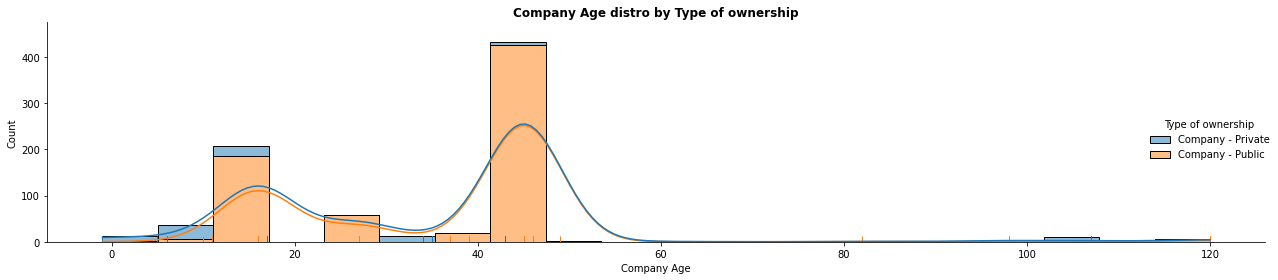

In [40]:
plt.figure(figsize=(9,6))
for h,l in zip(hue_variables,length):
    #plt.subplot(3,2,l)
    sns.displot(data=seattle_jobs, x='Company Age', kde=True, hue=h, kind='hist', rug=True, height=4, aspect=4, multiple='stack')
    plt.title('Company Age distro by '+h, weight='bold')
plt.tight_layout()
plt.show()

### 1D) Correlations

In [41]:
seattle_jobs[['Avg Salary','Rating','Company Age','Title','Python','SQL','Seniority']].corr()

,Avg Salary,Rating,Company Age,Python,SQL
Avg Salary,1.000000,-0.007209,-0.110979,-0.015423,-0.028607
Rating,-0.007209,1.000000,0.145936,-0.513542,-0.081639
Company Age,-0.110979,0.145936,1.000000,-0.144095,-0.198030
Python,-0.015423,-0.513542,-0.144095,1.000000,0.406383
SQL,-0.028607,-0.081639,-0.198030,0.406383,1.000000


<AxesSubplot:>

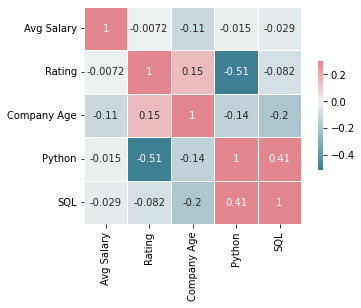

In [42]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(seattle_jobs[['Avg Salary','Rating','Company Age','Title','Python','SQL','Seniority']].corr(), vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink":0.5}, annot=True)

### 1E) Value Distributions

In [43]:
seattle_jobs.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly', 'Employer Provided',
       'Salary', 'Min Salary', 'Max Salary', 'Avg Salary', 'Location State',
       'Company', 'Company Age', 'Python', 'R Studio', 'AWS', 'ML', 'Tableau',
       'SQL', 'Excel', 'Spark', 'Apache', 'API', 'Seniority', 'Title'],
      dtype='object')

graph for %s: Rating


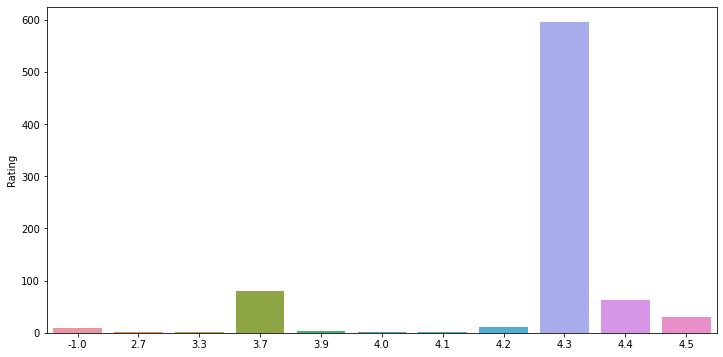

graph for %s: Location


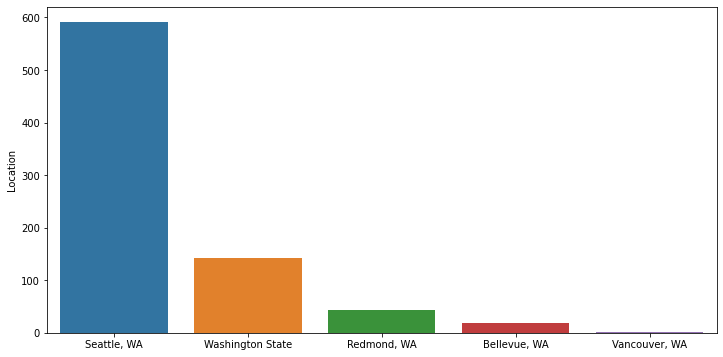

graph for %s: Size


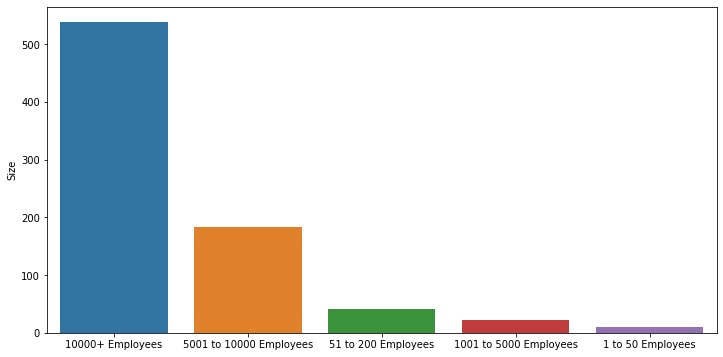

graph for %s: Type of ownership


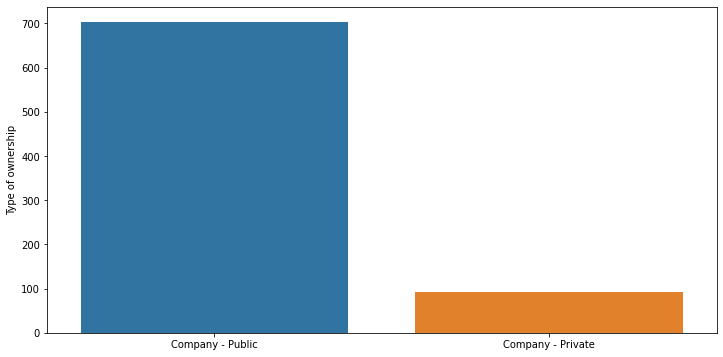

graph for %s: Seniority


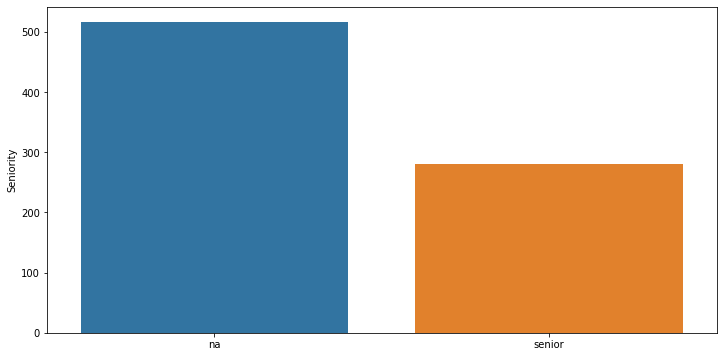

In [44]:
dist_columns_1 = ['Rating','Location','Size', 'Type of ownership','Seniority']
for i in dist_columns_1:
    cat_num = seattle_jobs[i].value_counts()
    print('graph for %s: '+i)
    plt.figure(figsize=(12,6))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    #chart.set_xticklabels(chart.get_ticklables(), rotation=90)
    plt.show()

graph for %s: Company Name


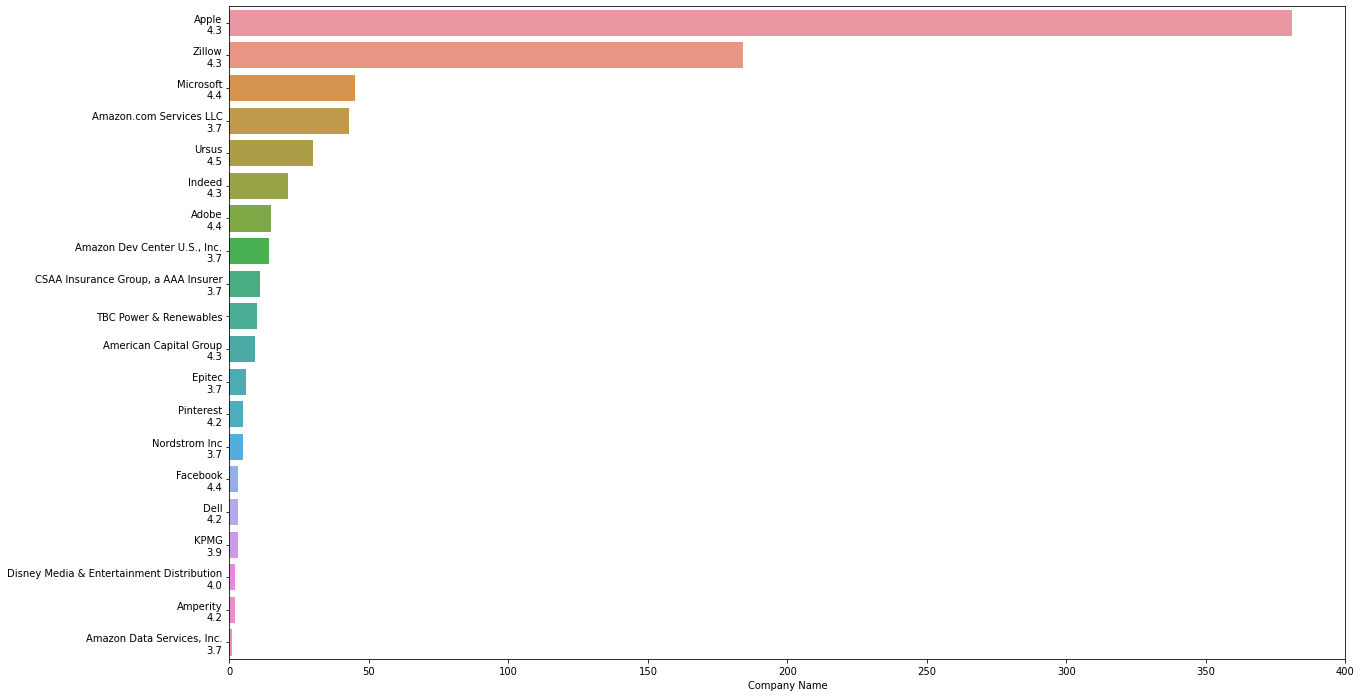

graph for %s: Company Age


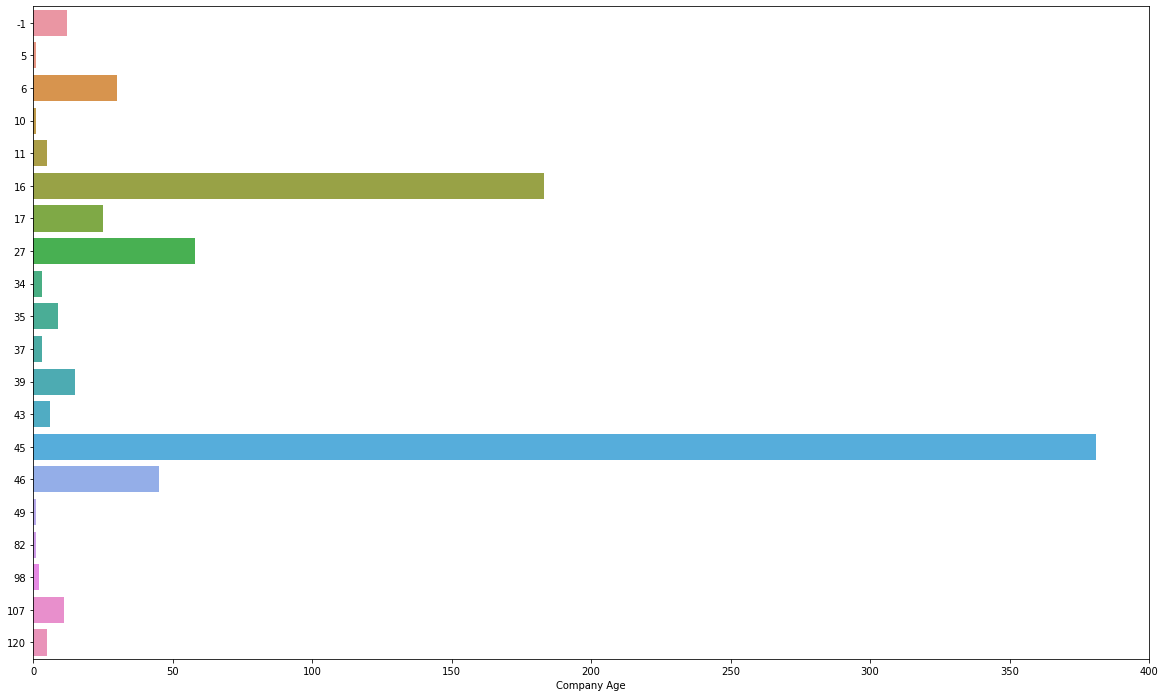

In [45]:
dist_columns_2 = ['Company Name', 'Company Age']
for i in dist_columns_2:
    cat_num = seattle_jobs[i].value_counts()[:20]
    print('graph for %s: '+i)
    plt.figure(figsize=(20,12))
    chart = sns.barplot(y=cat_num.index, x=cat_num, orient='h')
    #chart.set_xticklabels(chart.get_ticklables(), rotation=90)
    plt.show()

### 1F) Averages

In [46]:
pd.pivot_table(seattle_jobs, index = ['Title','Seniority'], values = 'Avg Salary')

Avg Salary
Title     Seniority            
analyst   na         104.818605
          senior      74.500000
engineer  na         153.232143
          senior     175.136364
mle       na         163.459459
na        na         136.250000
scientist na         154.005571
          senior     162.068249

In [52]:
pd.pivot_table(seattle_jobs, index='Location', values='Avg Salary')

,Avg Salary
Location,
"Bellevue, WA",134.894737
"Redmond, WA",153.313953
"Seattle, WA",149.541354
"Vancouver, WA",114.250000
Washington State,164.429577


In [47]:
pd.pivot_table(seattle_jobs, index='Industry', values='Avg Salary')

,Avg Salary
Industry,
-1,166.400000
Computer Hardware & Software,148.851674
Consulting,136.666667
Consumer Products Manufacturing,150.000000
"Department, Clothing, & Shoe Stores",139.900000
Enterprise Software & Network Solutions,74.500000
IT Services,144.196970
Insurance Carriers,143.500000
Internet,153.356322


In [49]:
pd.pivot_table(seattle_jobs, index='Rating', values='Avg Salary')

,Avg Salary
Rating,
-1.0,166.400000
2.7,85.500000
3.3,89.500000
3.7,144.237500
3.9,136.666667
4.0,102.250000
4.1,150.000000
4.2,118.000000
4.3,153.904874


In [50]:
pd.pivot_table(seattle_jobs, index='Revenue', values='Avg Salary')

,Avg Salary
Revenue,
$1 to $2 billion (USD),162.667553
$10+ billion (USD),147.924498
$100 to $500 million (USD),132.000000
$2 to $5 billion (USD),172.090909
$5 to $10 billion (USD),161.236000
Unknown / Non-Applicable,146.150794


In [48]:
pd.pivot_table(seattle_jobs, index='Company Age', values='Avg Salary')

,Avg Salary
Company Age,
-1,153.791667
5,74.500000
6,146.250000
10,89.500000
11,139.900000
16,163.819672
17,168.780000
27,146.698276
34,136.666667


### 1G) Job Description

In [48]:
#pip install wordcloud

In [49]:
#pip install nltk

In [53]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

## 2. US Data

### 2A) Avg Salary Distribution

<Figure size 648x432 with 0 Axes>

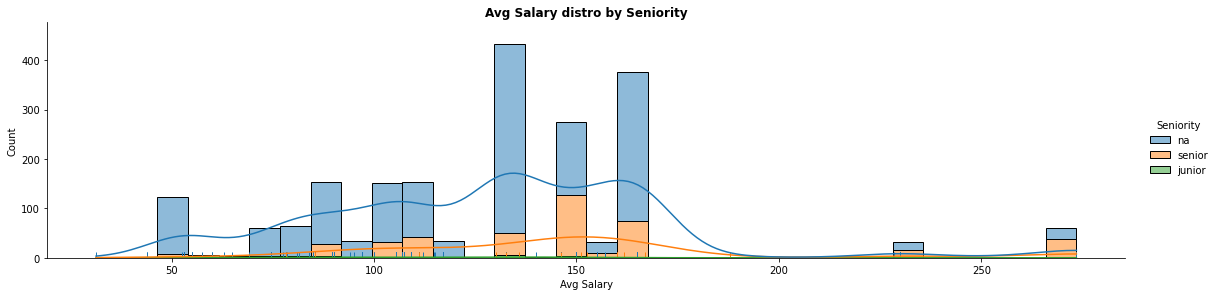

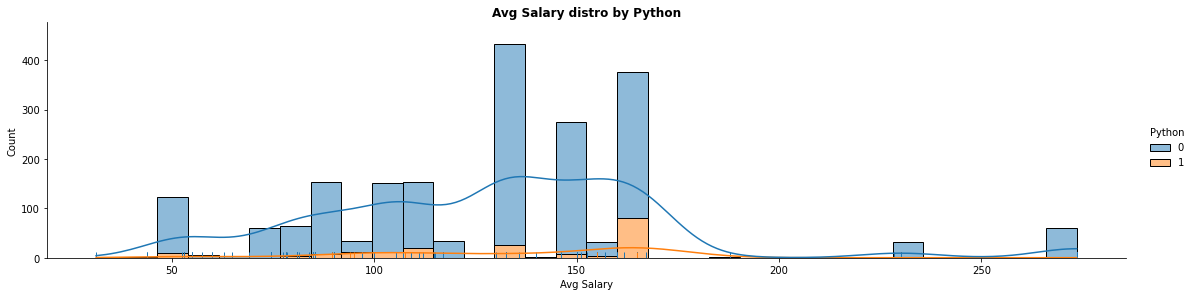

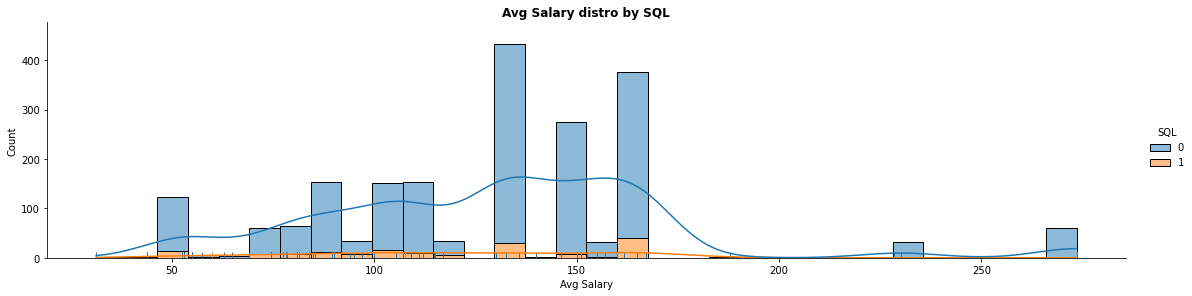

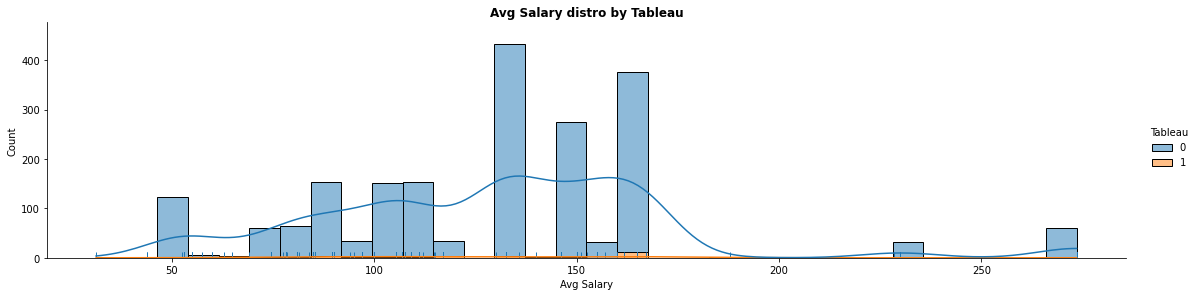

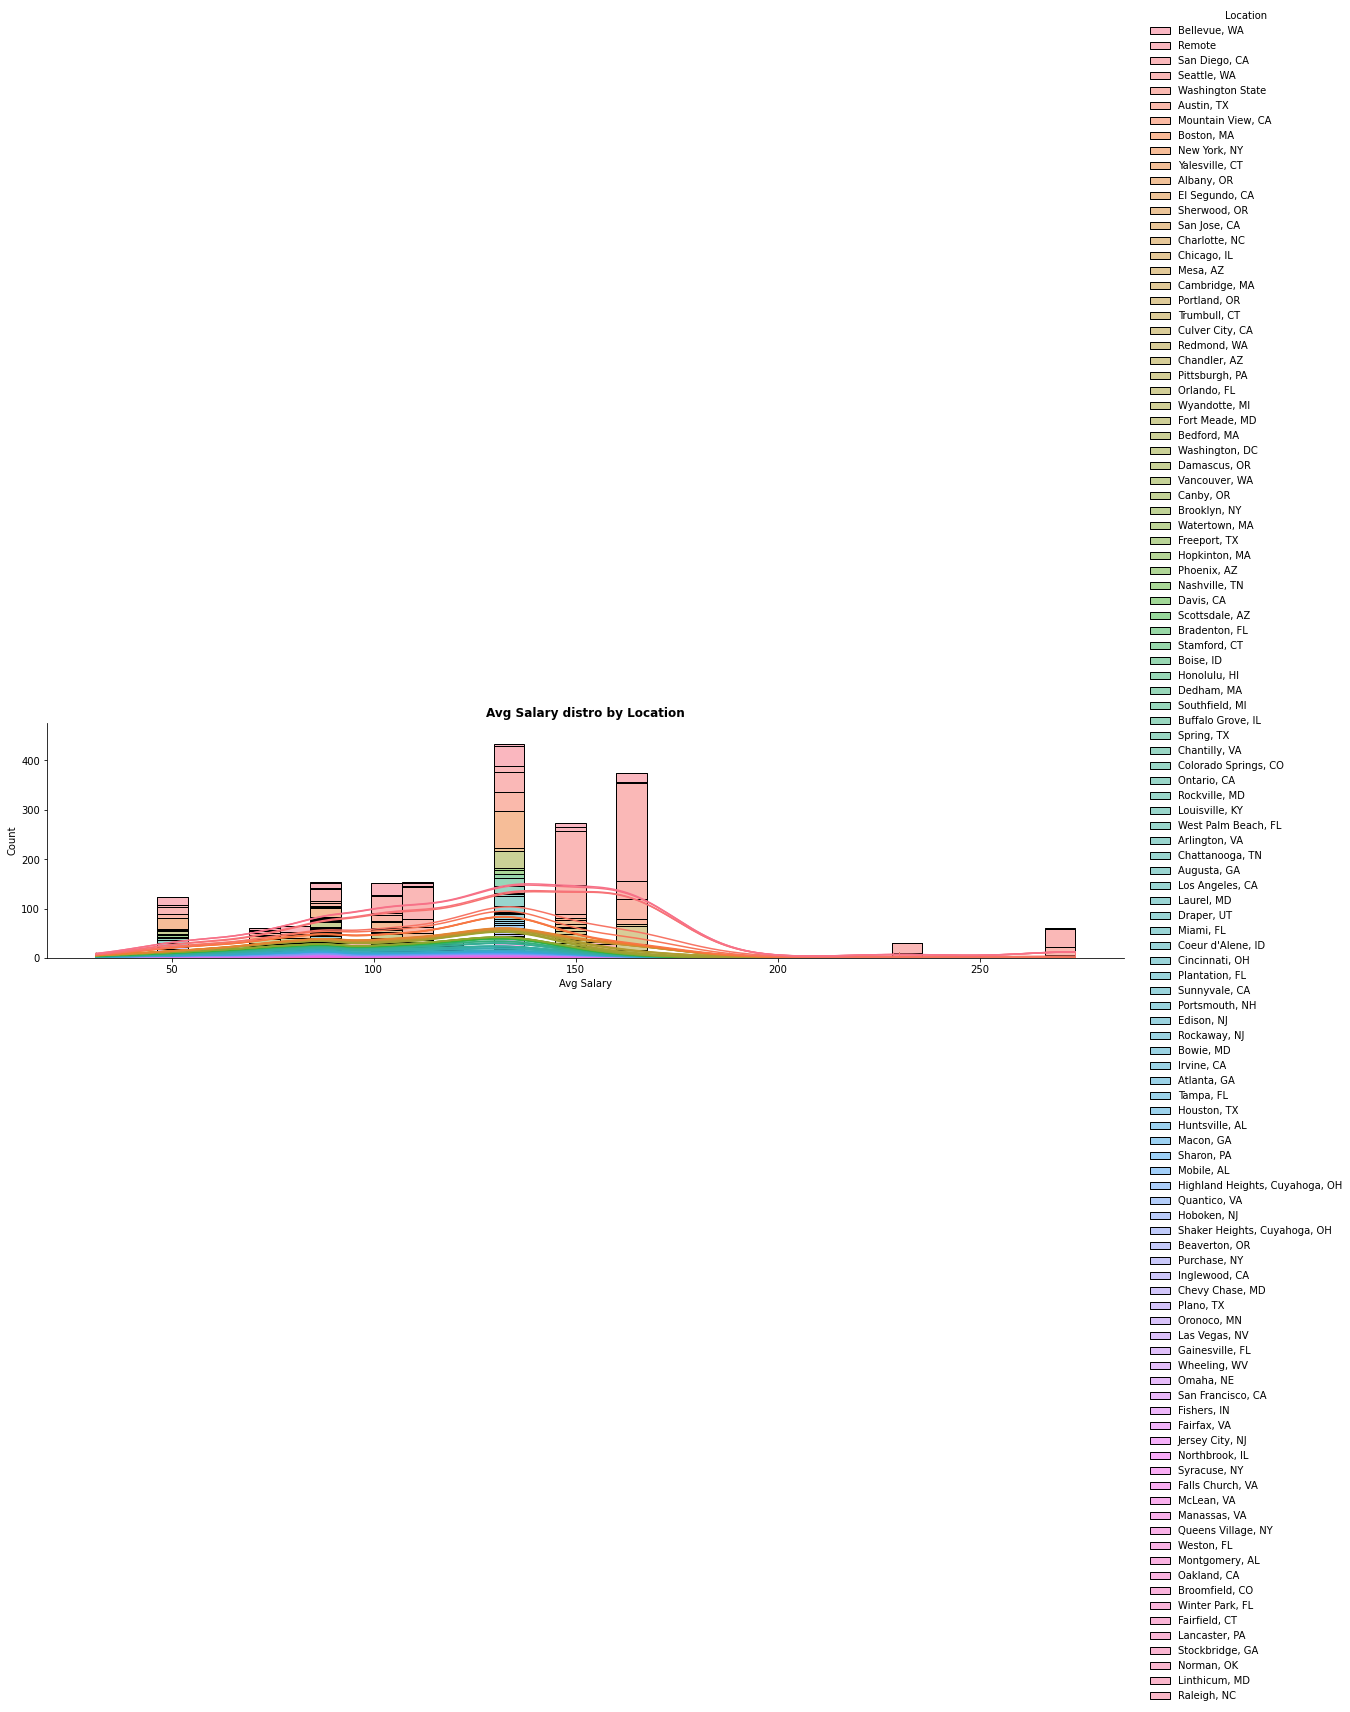

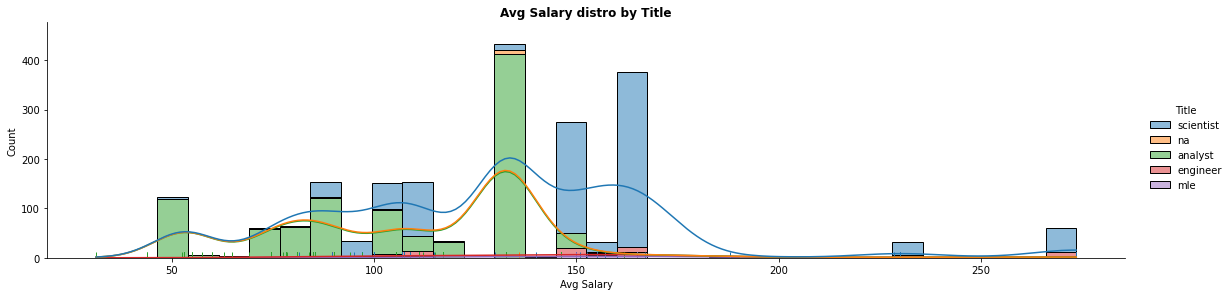

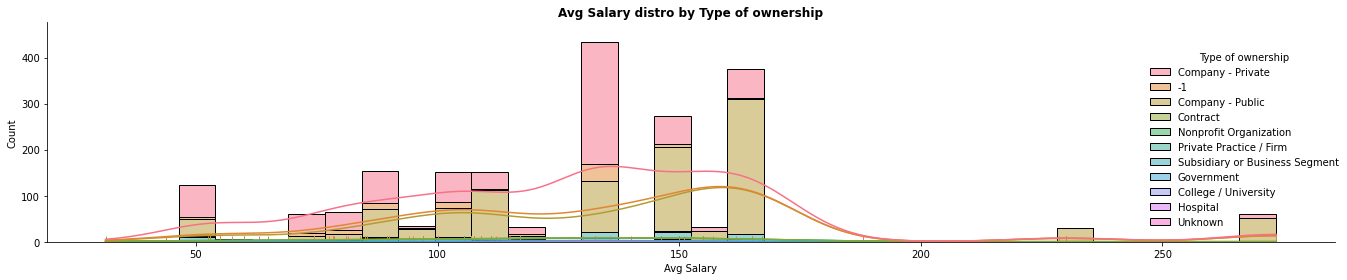

In [57]:
plt.figure(figsize=(9,6))
for h,l in zip(hue_variables,length):
    #plt.subplot(3,2,l)
    sns.displot(data=jobs_data, x='Avg Salary', kde=True, hue=h, kind='hist', rug=True, height=4, aspect=4, multiple='stack')
    plt.title('Avg Salary distro by '+h, weight='bold')
plt.tight_layout()
plt.show()

### 2B) Rating Distribution

LinAlgError: singular matrix

<Figure size 648x432 with 0 Axes>

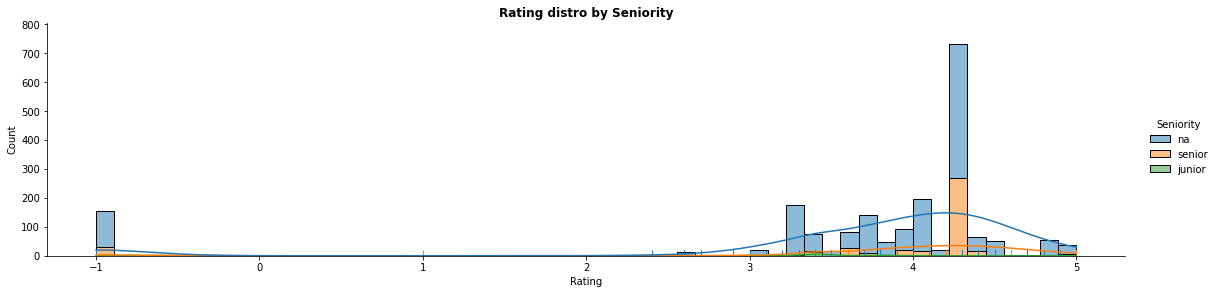

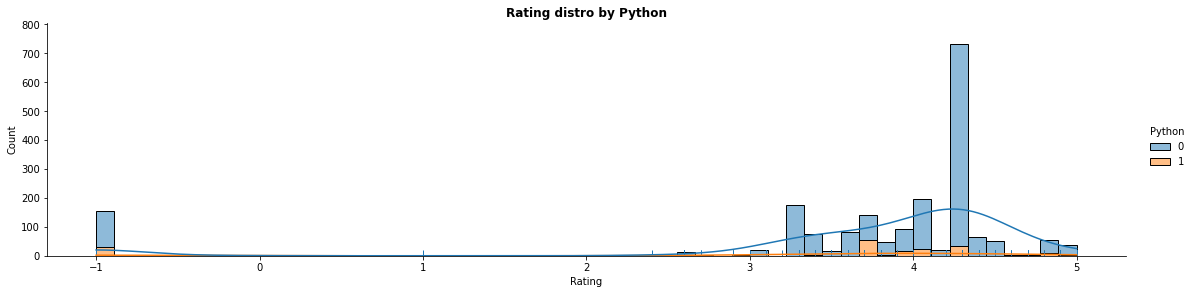

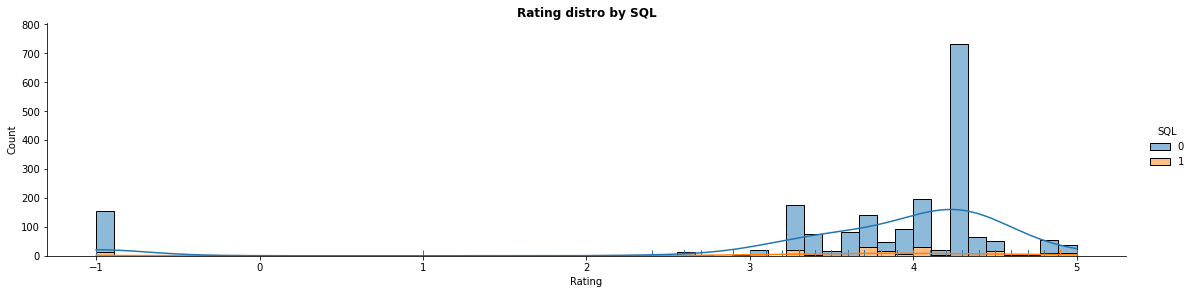

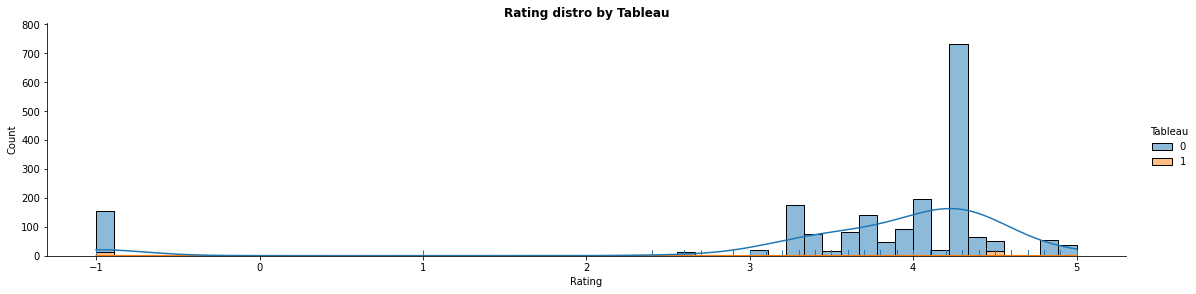

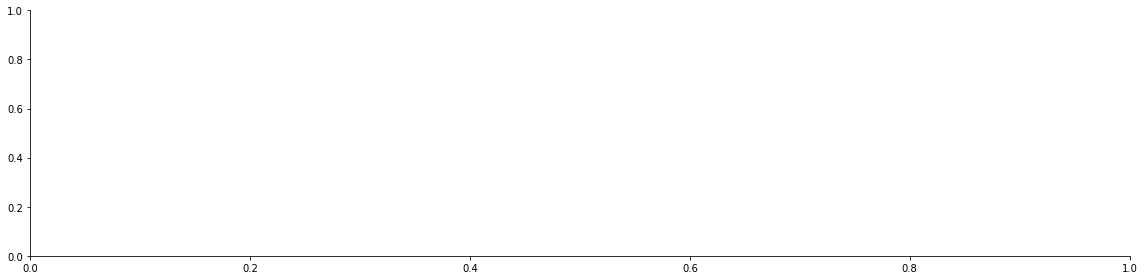

In [58]:
plt.figure(figsize=(9,6))
for h,l in zip(hue_variables,length):
    #plt.subplot(3,2,l)
    sns.displot(data=jobs_data, x='Rating', kde=True, hue=h, kind='hist', rug=True, height=4, aspect=4, multiple='stack')
    plt.title('Rating distro by '+h, weight='bold')
plt.tight_layout()
plt.show()

### 2C) Company Age

<Figure size 648x432 with 0 Axes>

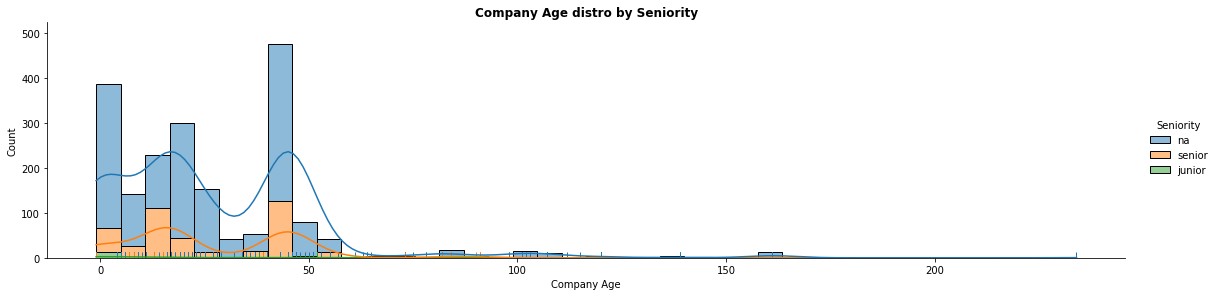

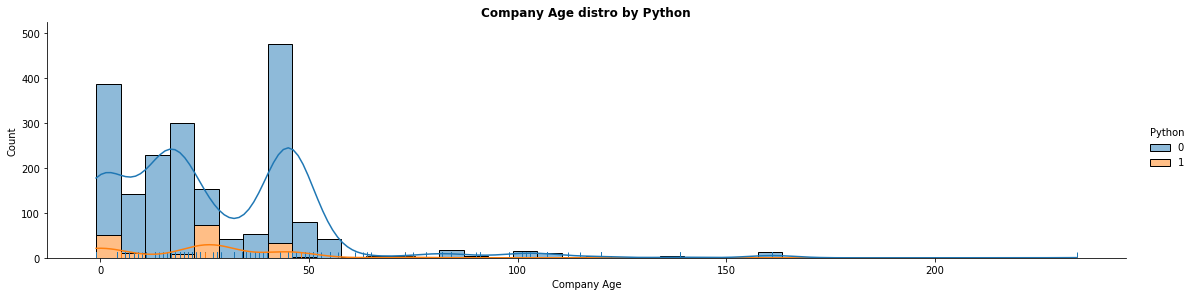

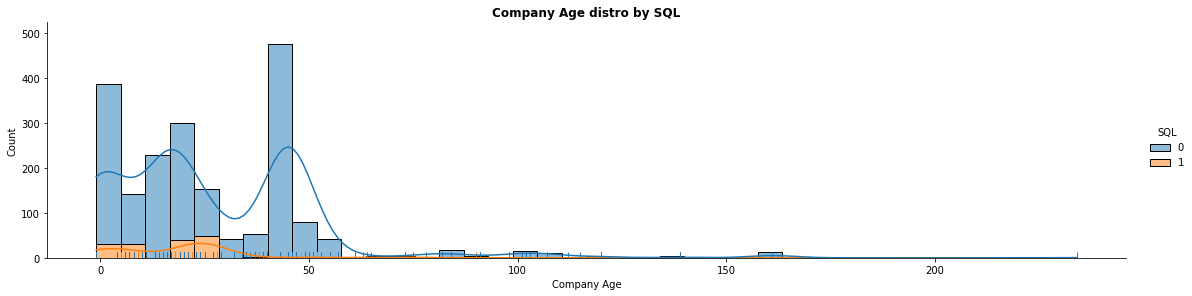

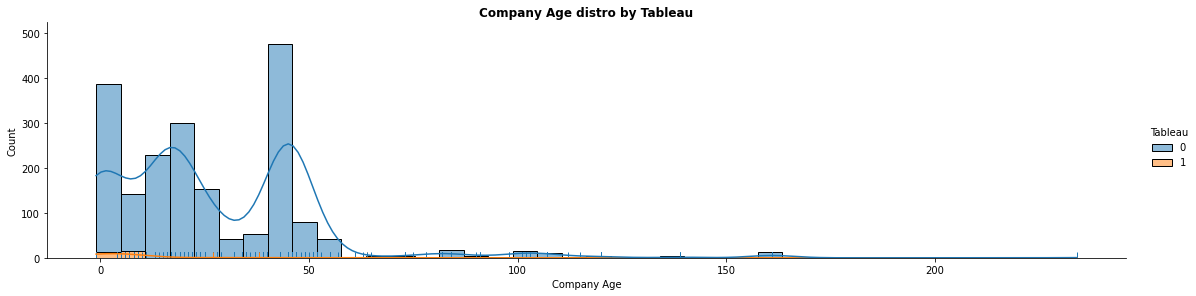

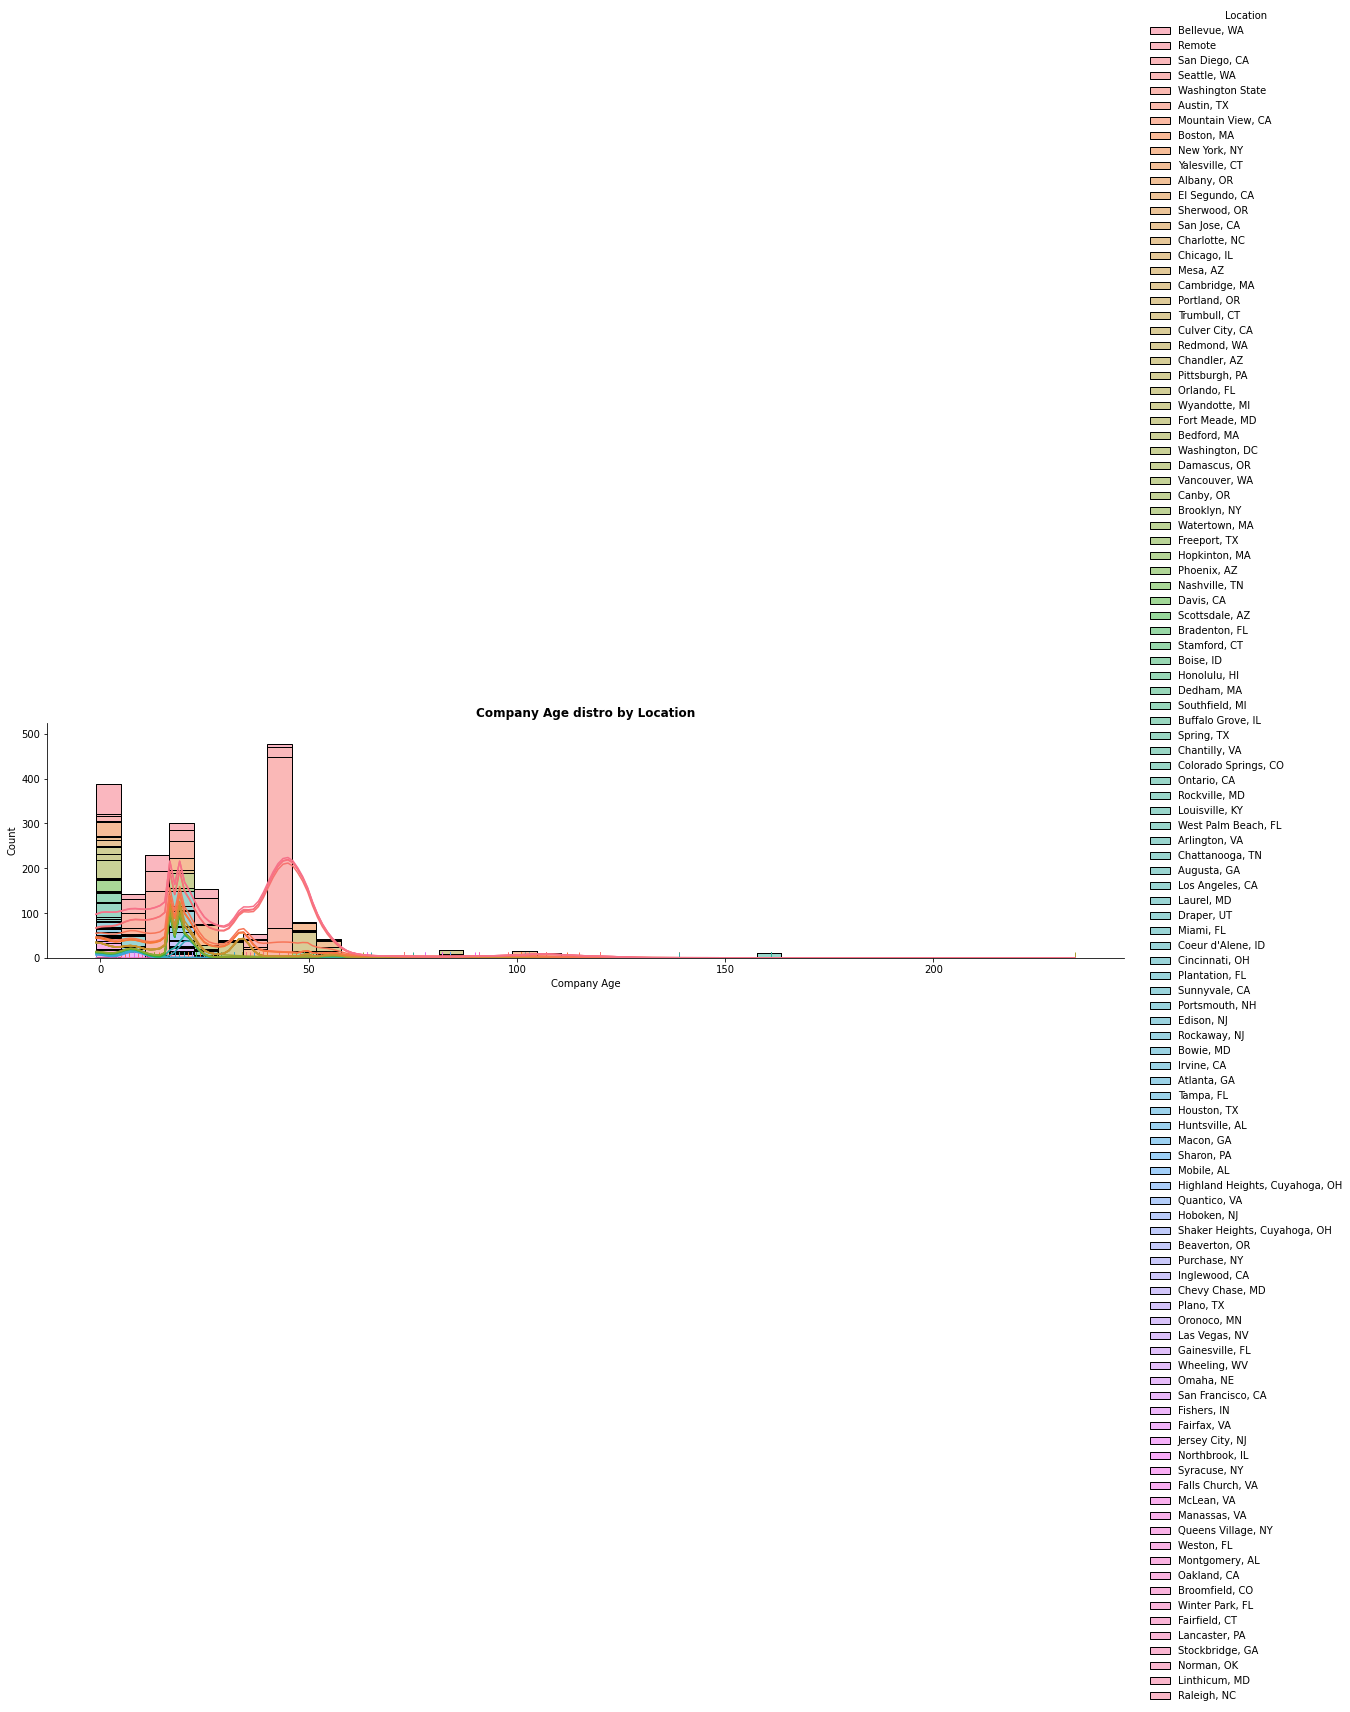

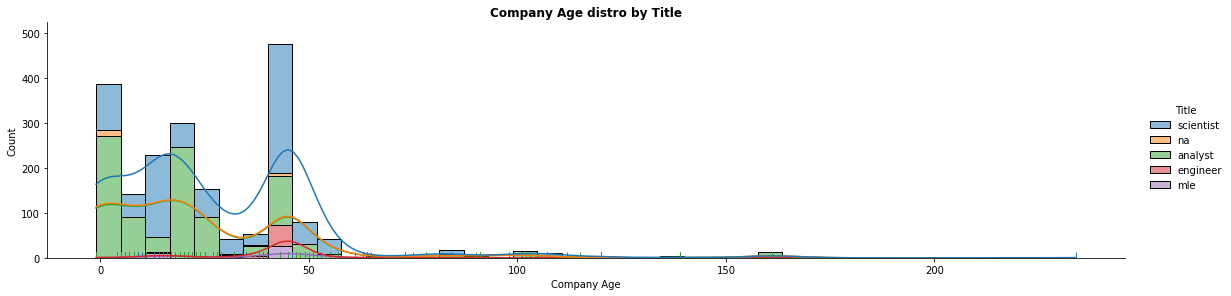

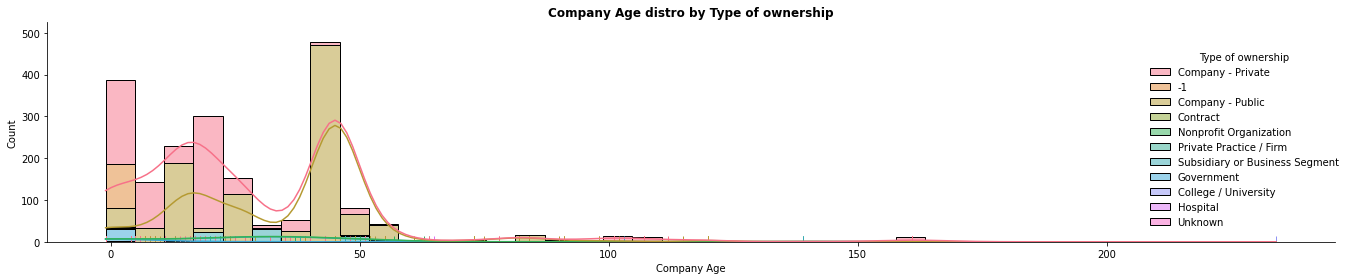

In [59]:
plt.figure(figsize=(9,6))
for h,l in zip(hue_variables,length):
    #plt.subplot(3,2,l)
    sns.displot(data=jobs_data, x='Company Age', kde=True, hue=h, kind='hist', rug=True, height=4, aspect=4, multiple='stack')
    plt.title('Company Age distro by '+h, weight='bold')
plt.tight_layout()
plt.show()

### 2D) Data Correlations

<AxesSubplot:>

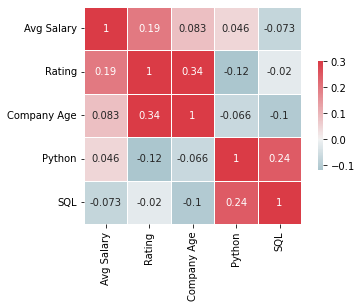

In [60]:
jobs_data[['Avg Salary','Rating','Company Age','Title','Python','SQL','Seniority']].corr()
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(jobs_data[['Avg Salary','Rating','Company Age','Title','Python','SQL','Seniority']].corr(), vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink":0.5}, annot=True)

### 2E) Value Distribution

graph for %s: Rating


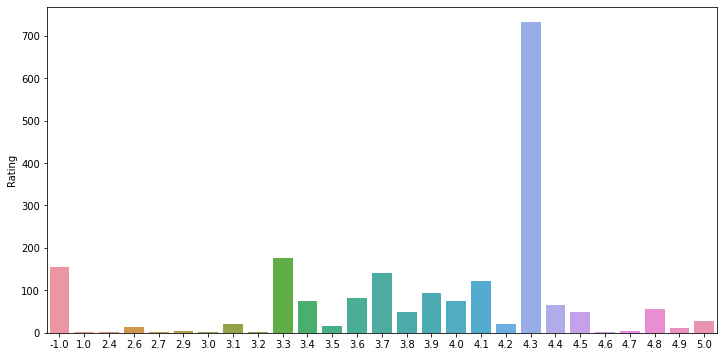

graph for %s: Location


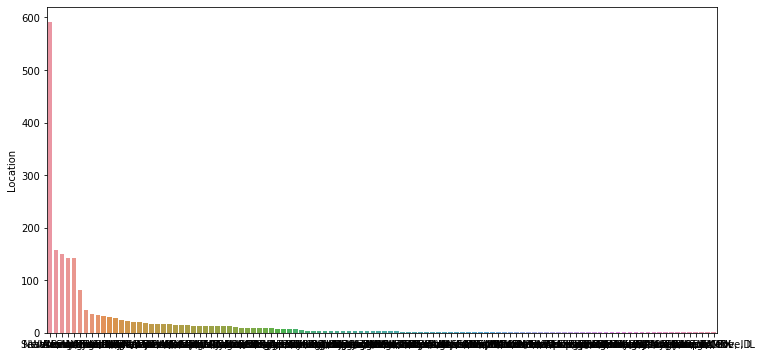

graph for %s: Size


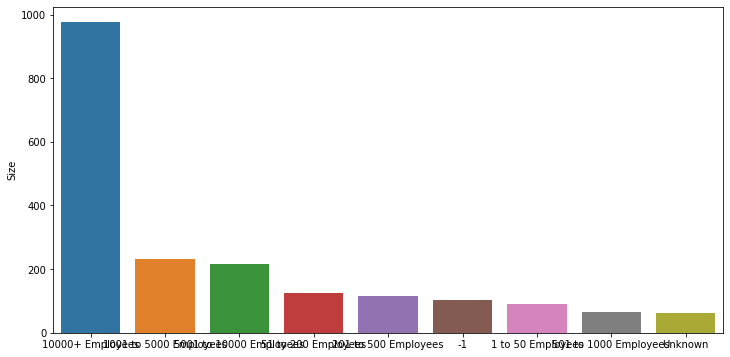

graph for %s: Type of ownership


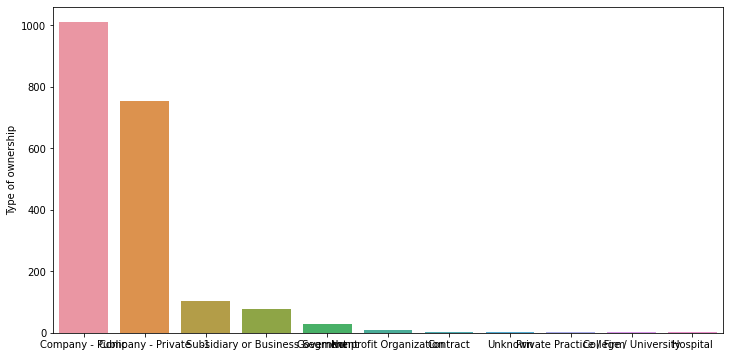

graph for %s: Seniority


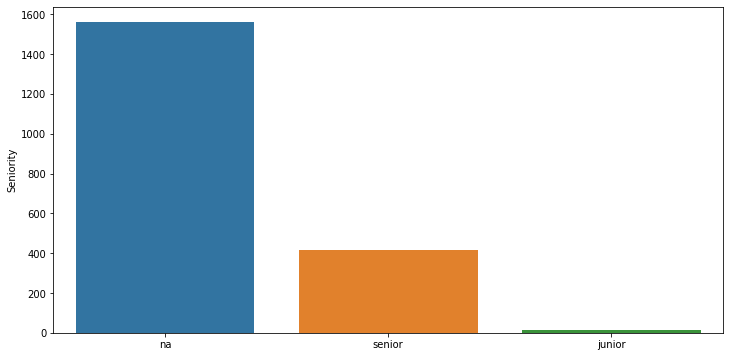

In [61]:
dist_columns_1 = ['Rating','Location','Size', 'Type of ownership','Seniority']
for i in dist_columns_1:
    cat_num = jobs_data[i].value_counts()
    print('graph for %s: '+i)
    plt.figure(figsize=(12,6))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    #chart.set_xticklabels(chart.get_ticklables(), rotation=90)
    plt.show()

graph for %s: Company Name


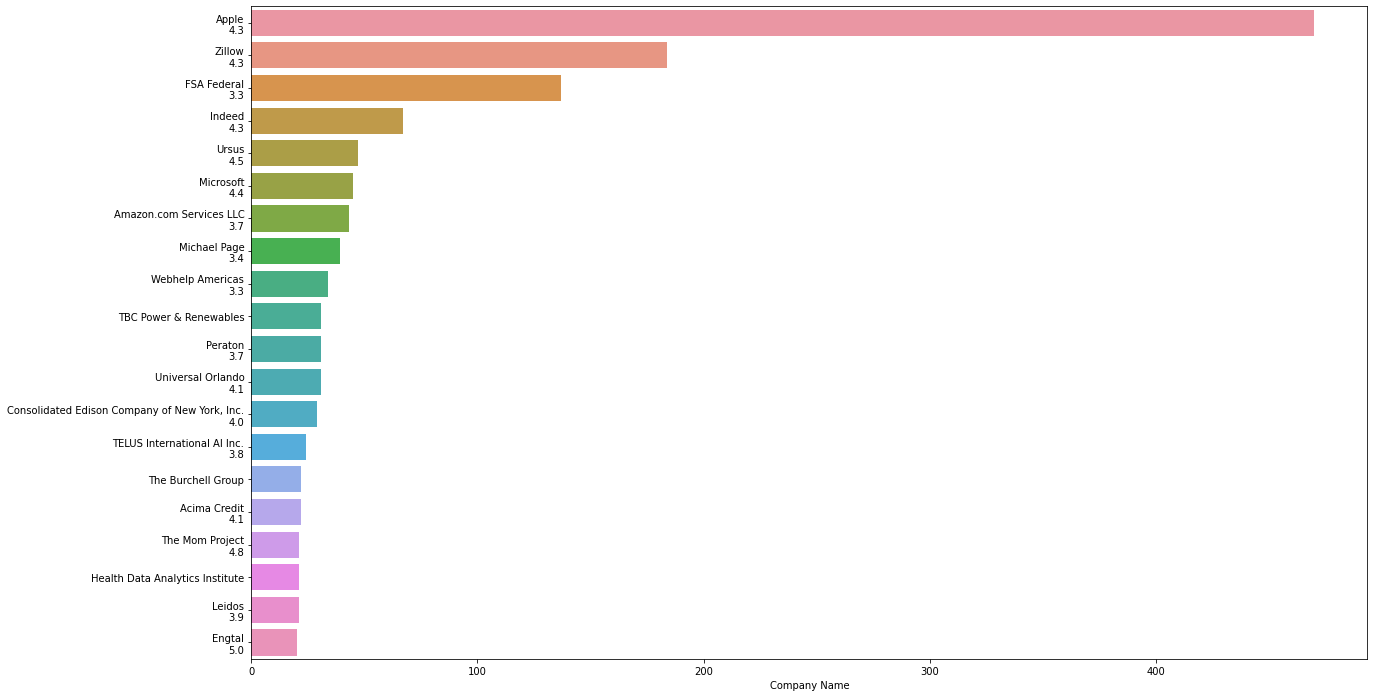

graph for %s: Company Age


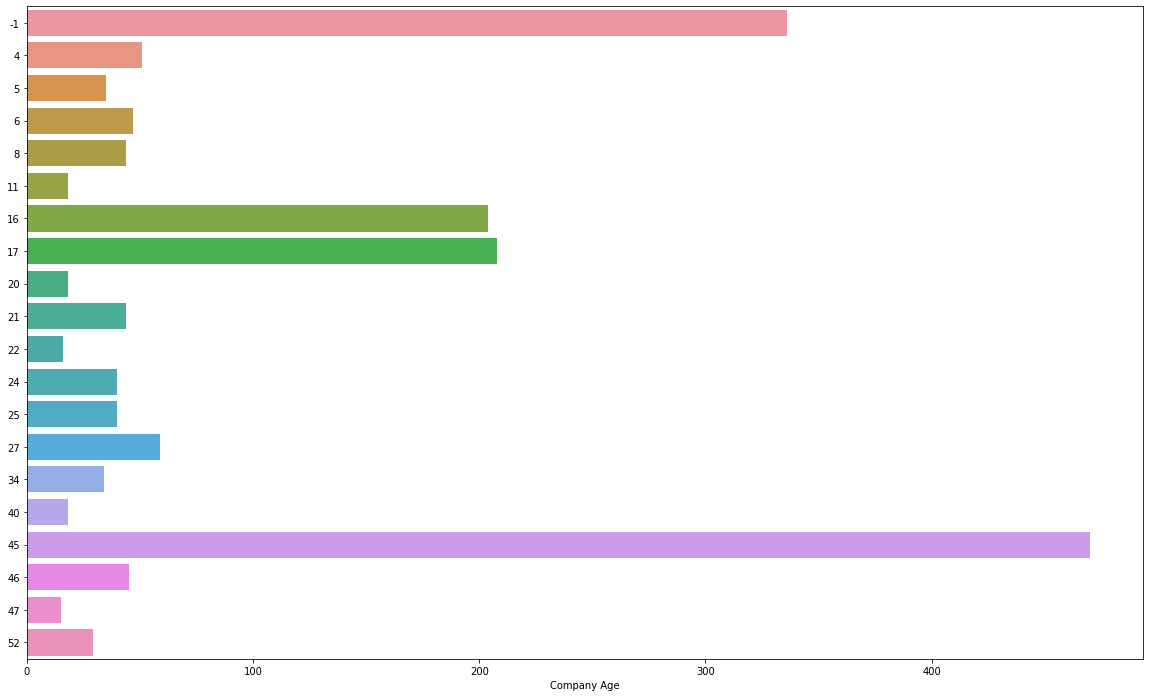

In [62]:
dist_columns_2 = ['Company Name', 'Company Age']
for i in dist_columns_2:
    cat_num = jobs_data[i].value_counts()[:20]
    print('graph for %s: '+i)
    plt.figure(figsize=(20,12))
    chart = sns.barplot(y=cat_num.index, x=cat_num, orient='h')
    #chart.set_xticklabels(chart.get_ticklables(), rotation=90)
    plt.show()

### 2F) Averages

In [66]:
pd.pivot_table(jobs_data, index = ['Title','Seniority'], values = 'Avg Salary')

Avg Salary
Title     Seniority            
analyst   junior     112.967500
          na         105.425962
          senior     114.030820
engineer  na         146.318182
          senior     171.166667
mle       na         163.459459
na        na         112.283810
          senior     135.720000
scientist na         150.013432
          senior     157.359212

In [51]:
pd.pivot_table(jobs_data, index='Industry', values='Avg Salary')

,Avg Salary
Industry,
-1,115.223803
Advertising & Marketing,100.266667
Aerospace & Defense,133.707027
Airlines,81.900000
Architectural & Engineering Services,80.625000
Banks & Credit Unions,124.000000
Biotech & Pharmaceuticals,125.269231
Building & Personnel Services,78.300000
Colleges & Universities,165.000000


In [56]:
pd.pivot_table(jobs_data, index='Location', values='Avg Salary', sort=True)

,Avg Salary
Location,
"Albany, OR",144.692308
"Arlington, VA",118.973333
"Atlanta, GA",107.032857
"Augusta, GA",111.250000
"Austin, TX",130.959161
...,...
"Weston, FL",77.750000
"Wheeling, WV",85.500000
"Winter Park, FL",89.833333


In [60]:
jobs_data[jobs_data['Location']=='El Segundo, CA']
jobs_data[jobs_data['Location']=='Hopkinton, MA']
jobs_data[jobs_data['Location']=='Mesa, AZ']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,AWS,ML,Tableau,SQL,Excel,Spark,Apache,API,Seniority,Title
62,Data Scientist (NLP),$125K - $185K (Employer est.),"At Myndshft, data is in our DNA.\nWe are seeki...",-1.0,"Myndshft Technologies, Inc.","Mesa, AZ",1 to 50 Employees,2016,Company - Private,Enterprise Software & Network Solutions,...,0,0,0,0,0,0,0,0,na,scientist


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,AWS,ML,Tableau,SQL,Excel,Spark,Apache,API,Seniority,Title
640,SR MACHINE LEARNING SCIENTIST,$127K - $203K (Employer est.),The mission of Best Buy is to enrich the lives...,3.7,Best Buy\n3.7,"Hopkinton, MA",10000+ Employees,1966,Company - Public,Consumer Electronics & Appliances Stores,...,0,1,0,0,0,0,0,0,senior,scientist


In [52]:
pd.pivot_table(seattle_jobs, index='Rating', values='Avg Salary')

,Avg Salary
Rating,
-1.0,166.400000
2.7,85.500000
3.3,89.500000
3.7,144.237500
3.9,136.666667
4.0,102.250000
4.1,150.000000
4.2,118.000000
4.3,153.904874


In [53]:
pd.pivot_table(seattle_jobs, index='Revenue', values='Avg Salary')

,Avg Salary
Revenue,
$1 to $2 billion (USD),162.667553
$10+ billion (USD),147.924498
$100 to $500 million (USD),132.000000
$2 to $5 billion (USD),172.090909
$5 to $10 billion (USD),161.236000
Unknown / Non-Applicable,146.150794


In [68]:
pd.pivot_table(jobs_data, index='Company Age', values='Avg Salary')

,Avg Salary
Company Age,
-1,113.483417
4,122.156078
5,127.814857
6,128.861702
7,132.500000
...,...
115,132.500000
120,139.900000
139,128.553333


## Model Building
After the EDA let's move on to create a Machine Learning Model.
We are going to explore the following models:
1. Linear
2. Multilinear
3. Lasso
4. Random Forest
5. GridSearchCV
6. XGBoost?
7. SVM?
8. Test Ensemble

In [61]:
# select relevant columns for the model
jobs_model = jobs_data[['Avg Salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','Employer Provided','Location State','Company Age','Python','AWS','Tableau','SQL','Excel','Seniority','Title']]

In [63]:
# get dummy data
jobs_dum = pd.get_dummies(jobs_model)

In [66]:
# train & test split
from sklearn.model_selection import train_test_split
X = jobs_dum.drop('Avg Salary', axis=1)
y = jobs_dum['Avg Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# multiple linear regression
import statsmodels.api as sm

In [69]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     8.085
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          6.98e-107
Time:                        12:40:19   Log-Likelihood:                -9900.2
No. Observations:                1992   AIC:                         2.006e+04
Df Residuals:                    1863   BIC:                         2.078e+04
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                28.4559     39.987      0.712      0.477     -49.967     106.879
Rating                                               -1.2900      2.777     -0.464      0.642      -6.737       4.157
Employer Provided                                    -9.4464      6.362     -1.485      0.138     -21.923       3.030
Company Age                                          -0.2168      0.111     -1.947      0.052      -0.435       0.002
Python                                               -0.3526      4.647     -0.076      0.940      -9.467       8.762
AWS                                                  -0.1883      7.644     -0.025      0.980     -15.180      14.804
Tableau                                              -6.1929     10.092     -0.614      0.540     -25.986      13.600
SQL                                                  -0.3297      5.549     -0.059      0.953     -11.212      10.552
Excel                                                -4.0259      4.799     -0.839      0.402     -13.438       5.386
Size_-1                                              15.6706     16.415      0.955      0.340     -16.523      47.864
Size_1 to 50 Employees                              -41.5426     18.721     -2.219      0.027     -78.259      -4.826
Size_10000+ Employees                                 1.5090     15.218      0.099      0.921     -28.337      31.355
Size_1001 to 5000 Employees                           9.8256     16.158      0.608      0.543     -21.864      41.515
Size_201 to 500 Employees                             4.5024     16.392      0.275      0.784     -27.647      36.652
Size_5001 to 10000 Employees                          5.6381     17.409      0.324      0.746     -28.505      39.782
Size_501 to 1000 Employees                           -6.3463     16.600     -0.382      0.702     -38.903      26.210
Size_51 to 200 Employees                            -19.6955     16.629     -1.184      0.236     -52.309      12.918
Size_Unknown                                        -18.3375     17.557     -1.044      0.296     -52.771      16.096
Type of ownership_-1                                 15.6706     16.415      0.955      0.340     -16.523      47.864
Type of ownership_College / University               30.2585     24.527      1.234      0.217     -17.845      78.362
Type of ownership_Company - Private                  31.0402     26.726      1.161      0.246     -21.375      83.456
Type of ownership_Company - Public                   18.4279     25.950      0.710      0.478     -32.466      69.322
Type of ownership_Contract                           45.9666     36.209      1.269      0.204     -25.047     116.980
Type of ownersh

In [70]:
# Lasso regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [75]:
# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-28.8970280300243

In [76]:
# Lasso Regression
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-28.030579940070396

In [77]:
alpha = []
error = []

In [78]:
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

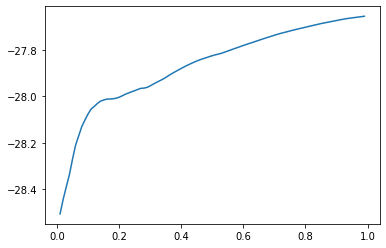

In [79]:
plt.plot(alpha,error)

In [80]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-27.652901


In [81]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [82]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-28.516257398189648

In [88]:
# tune models GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('auto','sqrt','log2')}

In [ ]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

In [ ]:
gs.best_score_
gs.best_estimator_

In [ ]:
# test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

In [ ]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

In [ ]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )


In [ ]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [ ]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

In [ ]:
list(X_test.iloc[1,:])